# RCFM Model

## 1. Import modules and helper functions

In [1]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.optimize import curve_fit

# Helper functions from DataAid.py and DataImport.py
import DataAid
import DataImporter

# Numerically stable class of functions from Neros_v2.py
import Neros_test

## 2. Load Galaxy Data

In [2]:
# Load Galaxy Data
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
sparc128Galaxies = DataAid.GetGalaxyData("data/Sparc/SparcSubset135/")
sparcTset = DataAid.GetGalaxyData("data/Sparc/TrainingSet/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")

# Load Milky Way Model Data
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")

# Create array of Milky Way radius and vlum tuples from model data
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])


## 3. Create Neros class instance

In [3]:
# Create Neros instance to perform calculations with the supplied Milky Way model as comparison
# Change Milky Way model by changing the variable in the parentheses
# i.e. neros_fns = Neros_v2.Neros(MWModelVariable)

neros_fns = Neros_test.Neros(MWXueSofue)
MW_name = "MWXueSofe" # Change this if you change the MW model in neros_fns!
MW_rad = neros_fns.mw_rad
MW_vLum = neros_fns.mw_vLum
#MW_phi = neros_fns.mw_phi

MW_vLum_interp_func = neros_fns.mw_vLum_interp

## 4. Designate outfile name, initialize variables, and designate galaxy sample

In [4]:
# This designates which galaxy sample to fit
galaxies = sparcTset
# Change this if galaxies changes - used to name output files
galaxies_name = "sparcTset"

# Change this when changing v1 or v2 function in Neros_test.py
v1v2="v1sech-curved_v2notsure"


## 5. Fit galaxies, print and save graphs

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


galaxyName is: UGCA442_rotmod
chi_squared is: 0.46625122940341607
alpha is: 8.790590540637275
disk_scale is: 2.0803381640394973
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 0.46625122940341607
galaxyName is: UGC04305_rotmod
chi_squared is: 1.5521638133458937
alpha is: 8.087229705531697e-10
disk_scale is: 0.8755211073483327
bulge_scale is: 1.0
phi_zero is: 3.618760298237866e-06
--------------------------
Running average chi_squared: 1.009207521374655
galaxyName is: NGC2841_rotmod
chi_squared is: 2.4147850393688617
alpha is: 0.0258111580324301
disk_scale is: 0.3502632648331738
bulge_scale is: 1.09118393873609
phi_zero is: 3.985111620249881e-06
--------------------------
Running average chi_squared: 1.477733360706057
galaxyName is: UGC07232_rotmod
chi_squared is: 0.2462503141835984
alpha is: 39.29063785899251
disk_scale is: 0.8186599648161866
bulge_scale is: 1.0
phi_zero is: 2.3682255868199998e-06
-------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


galaxyName is: UGC07151_rotmod
chi_squared is: 0.9471360545418168
alpha is: 0.37395195254319963
disk_scale is: 1.1544411173346614
bulge_scale is: 1.0
phi_zero is: 3.1310131610425587e-06
--------------------------
Running average chi_squared: 2.259329183263076
galaxyName is: UGC04483_rotmod
chi_squared is: 0.271145731762023
alpha is: 43.36562002095172
disk_scale is: 1.2451123212273865
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 2.1689572081948465
galaxyName is: NGC0055_rotmod
chi_squared is: 2.459328338910594
alpha is: 1.2926375779729897
disk_scale is: 1.029158060700741
bulge_scale is: 1.0
phi_zero is: 3.558005140268911e-06
--------------------------
Running average chi_squared: 2.1815820399650967
galaxyName is: NGC2403_rotmod
chi_squared is: 19.882254708885924
alpha is: 0.3049814462553174
disk_scale is: 0.7835034449695248
bulge_scale is: 1.0
phi_zero is: 4.103703637097236e-06
--------------------------
Running average 

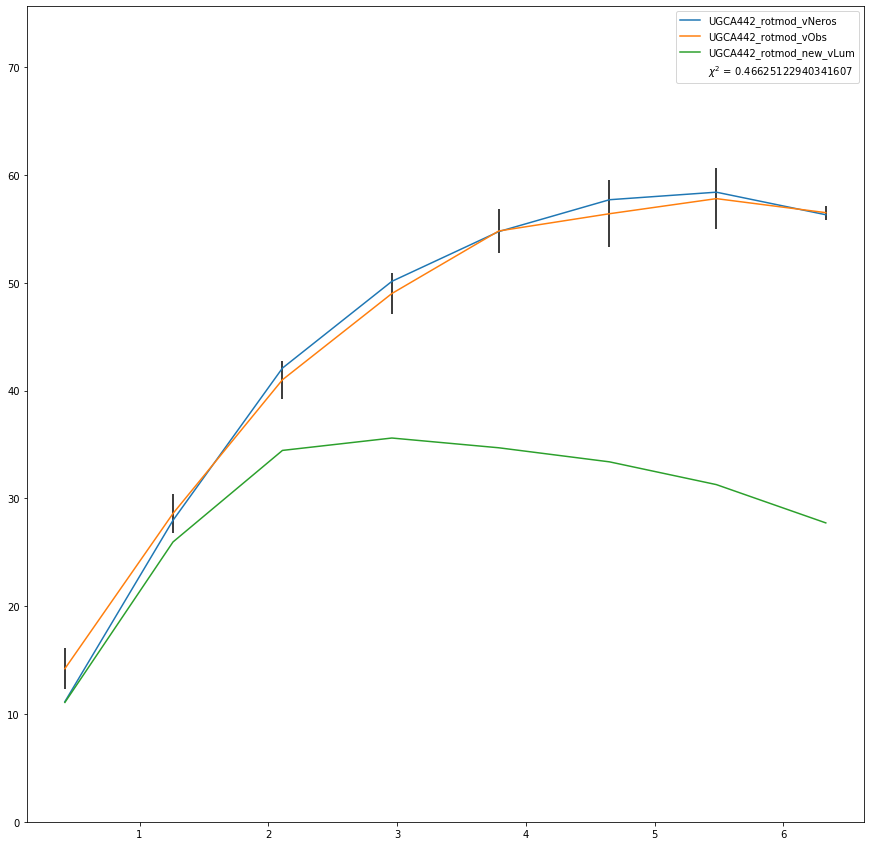

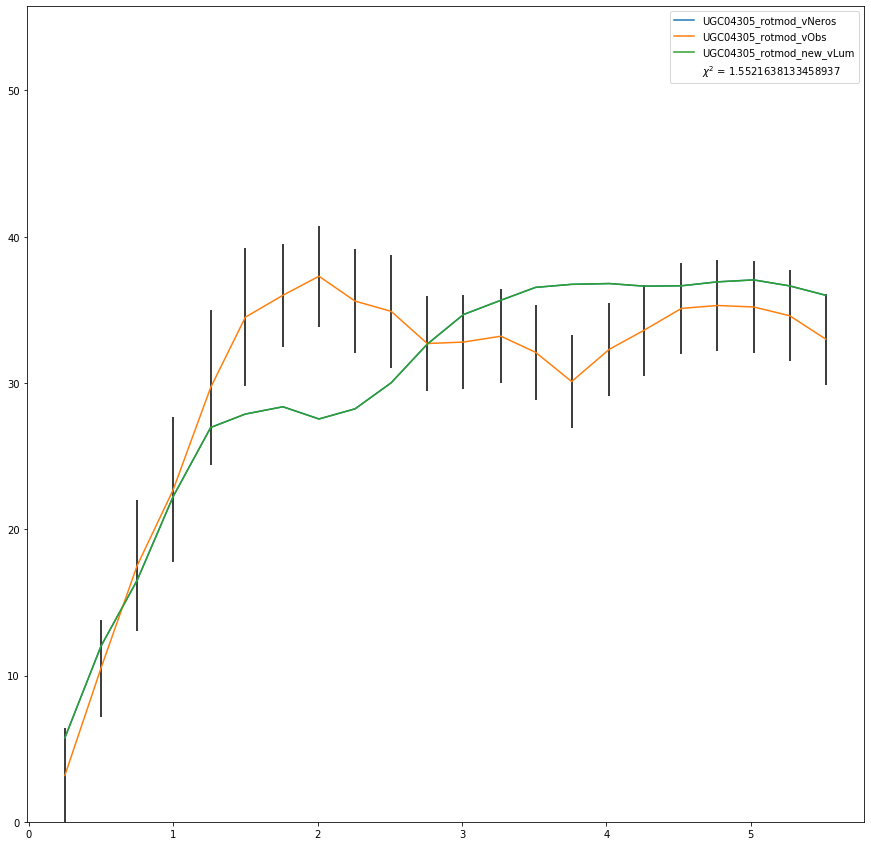

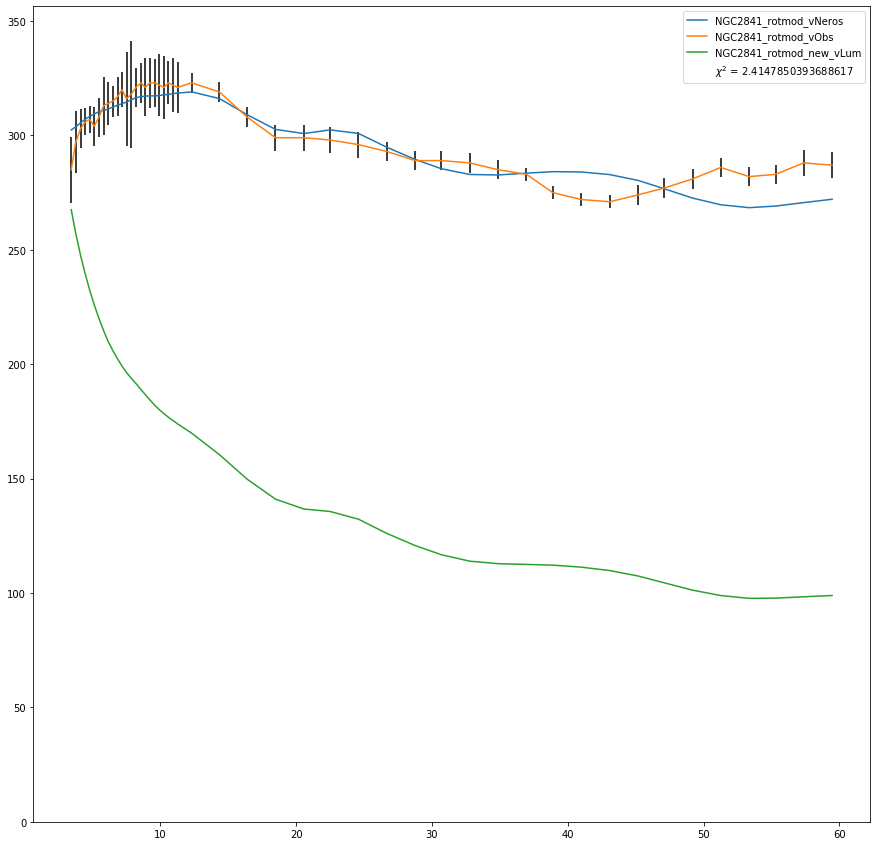

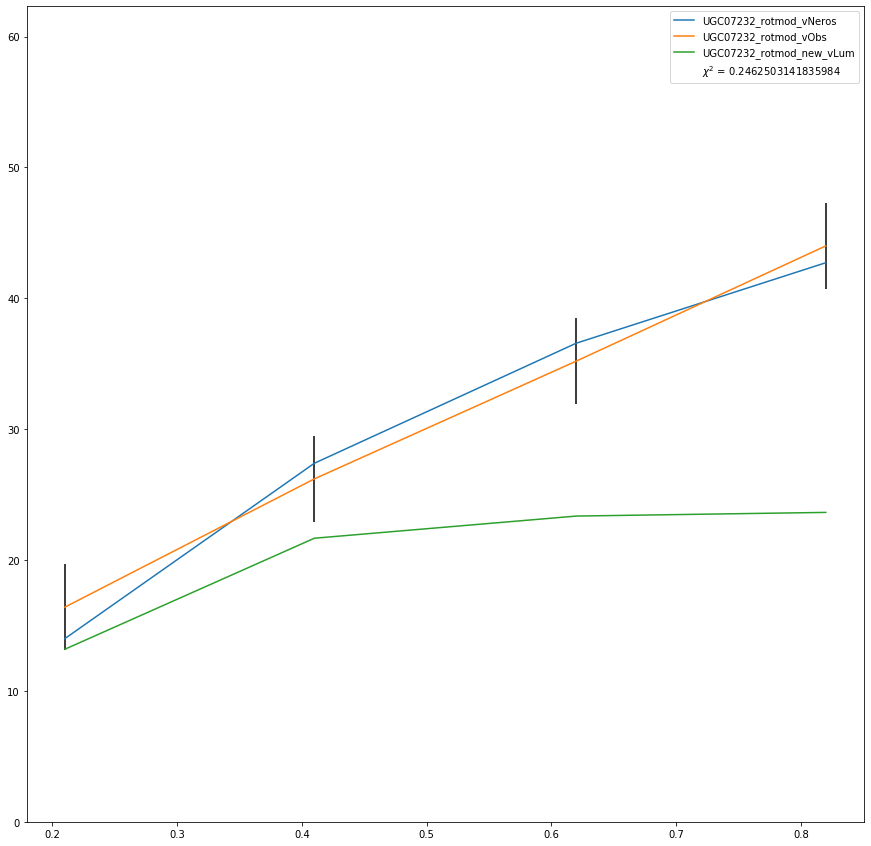

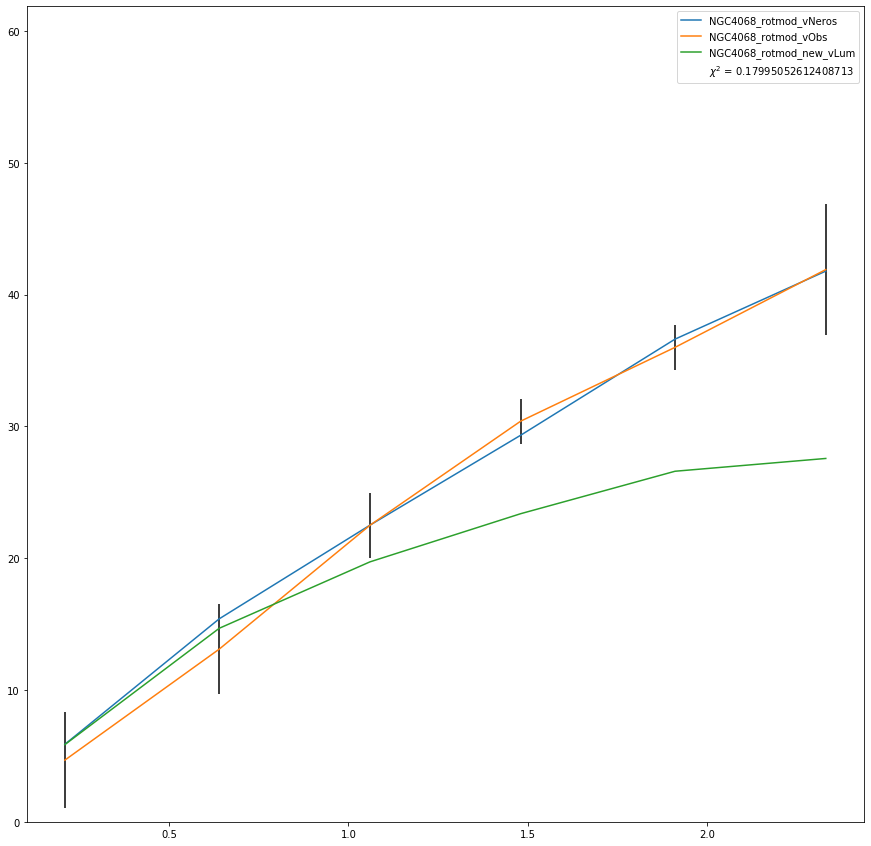

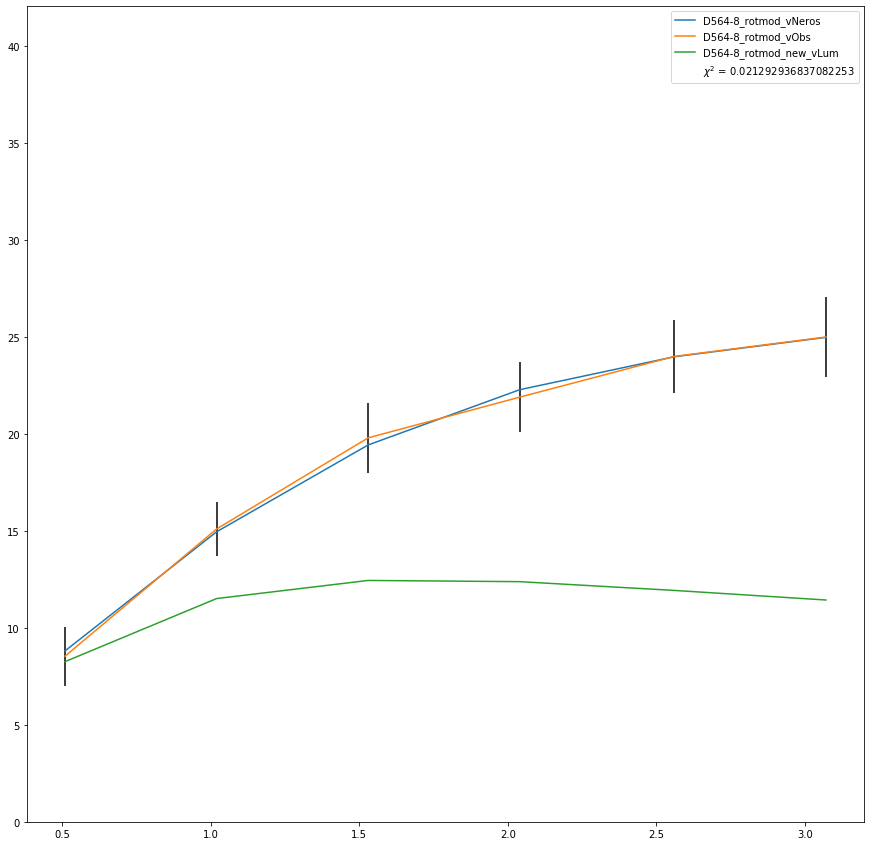

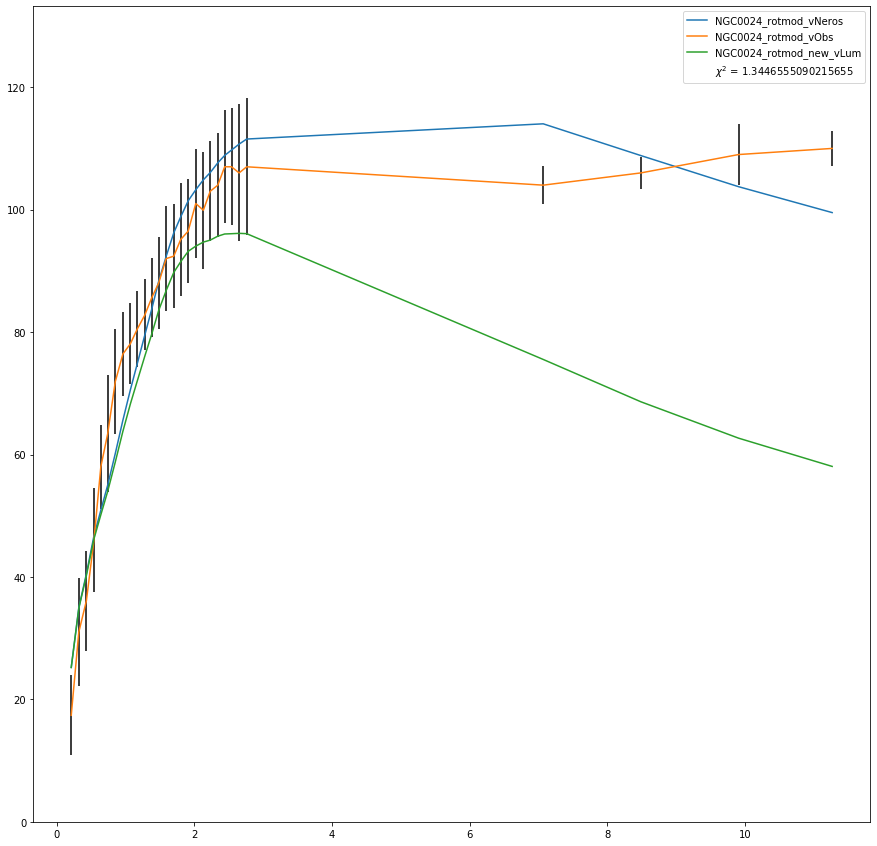

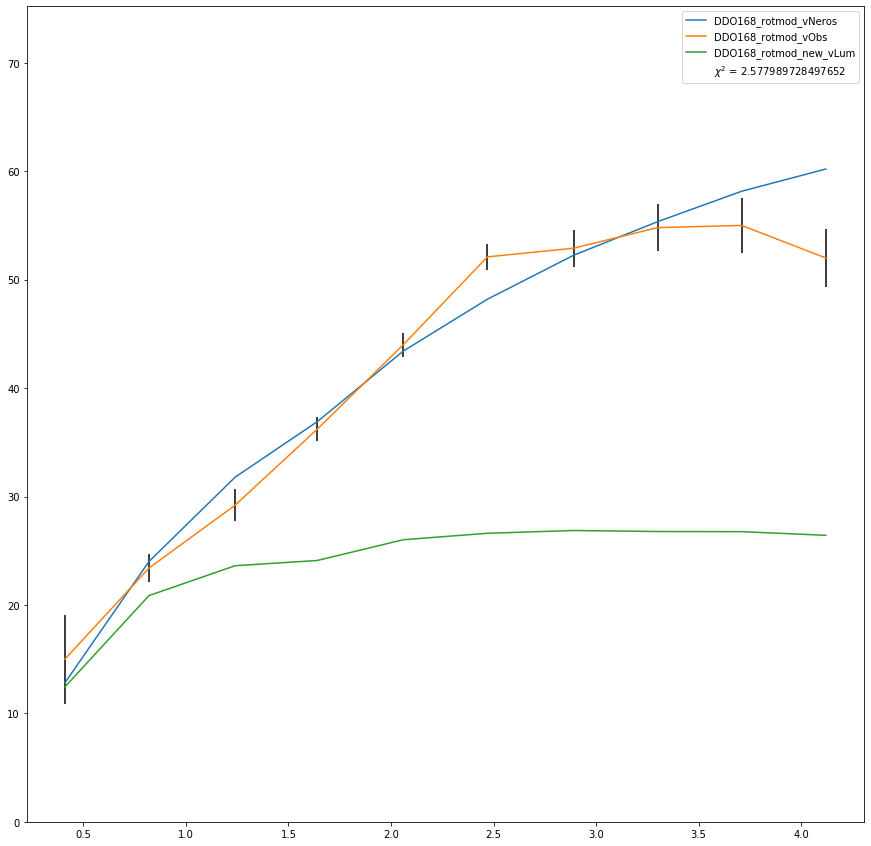

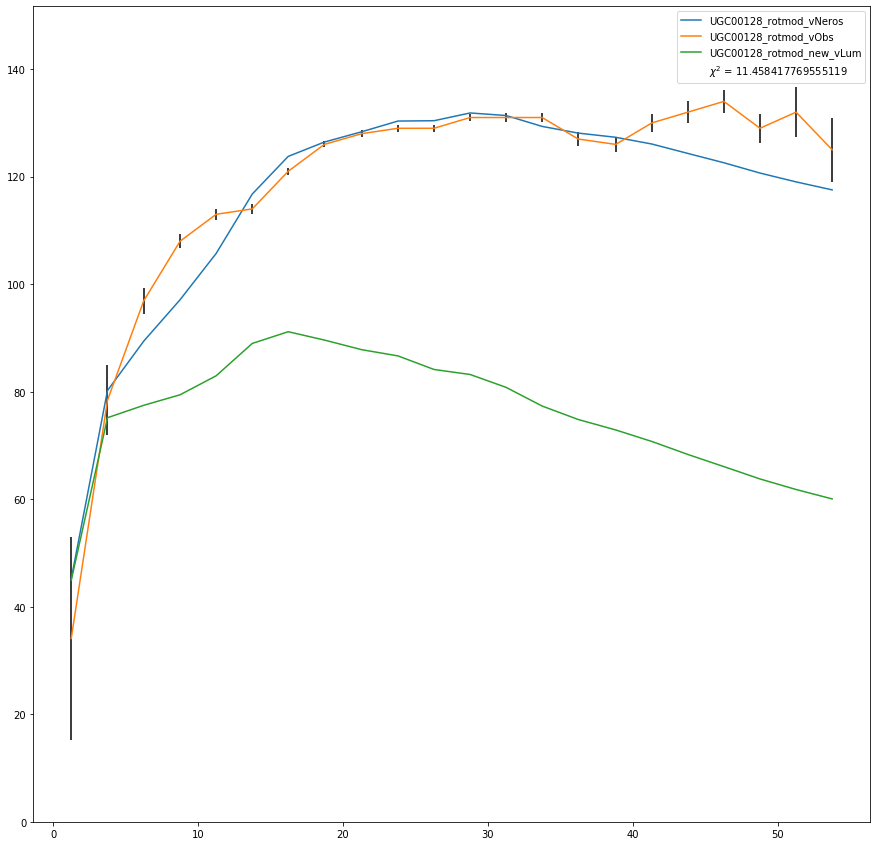

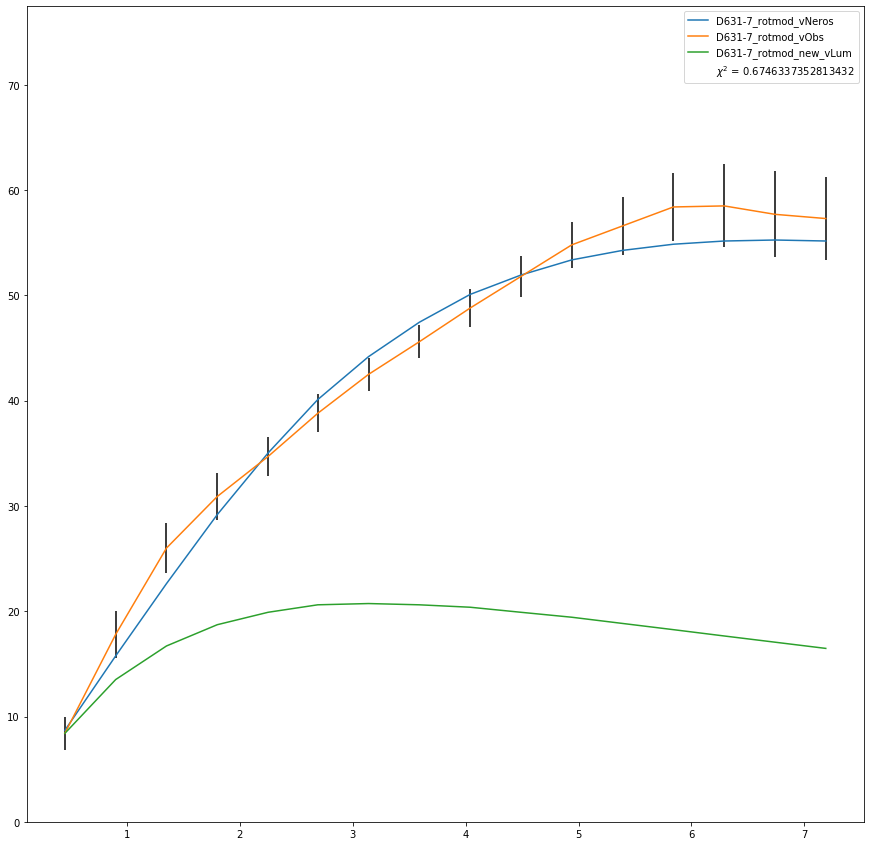

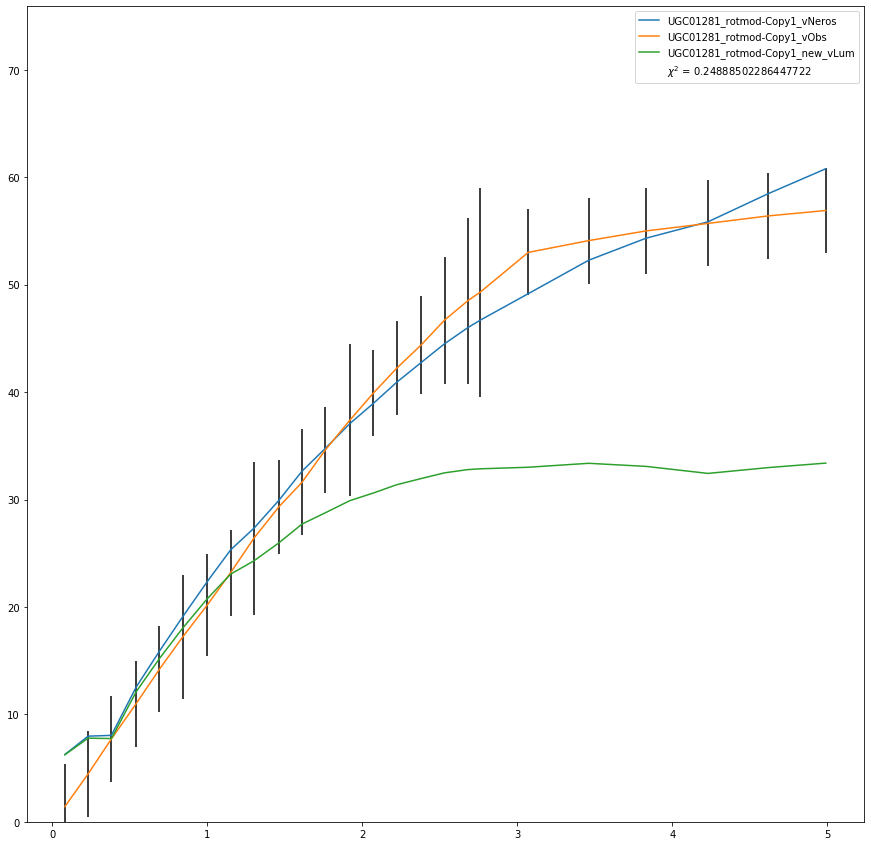

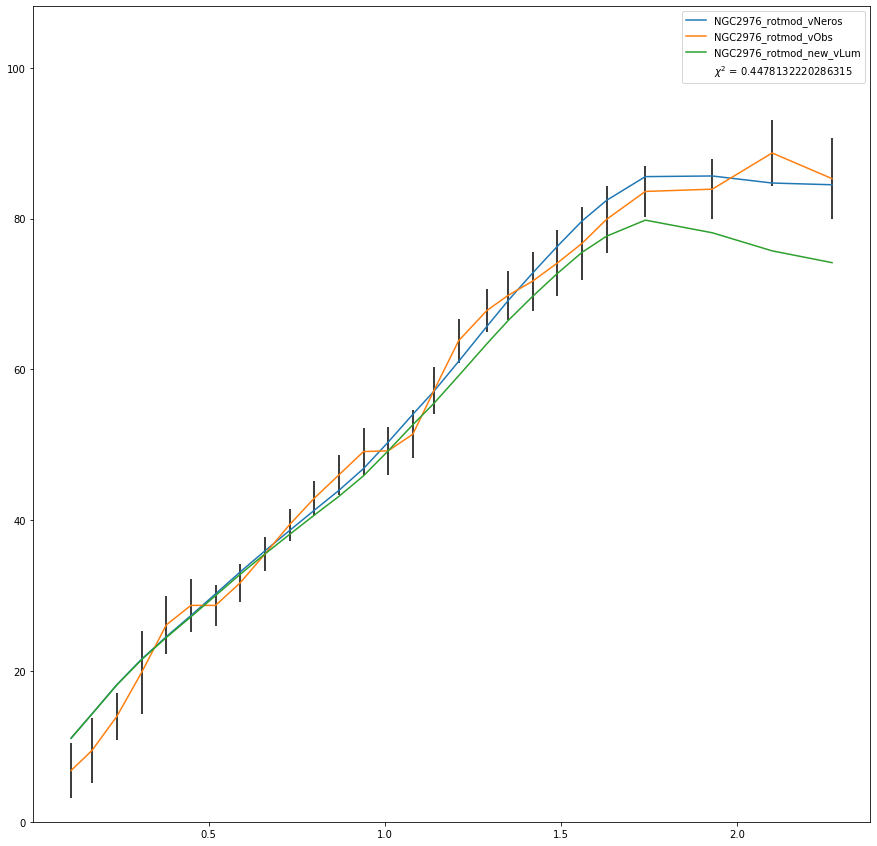

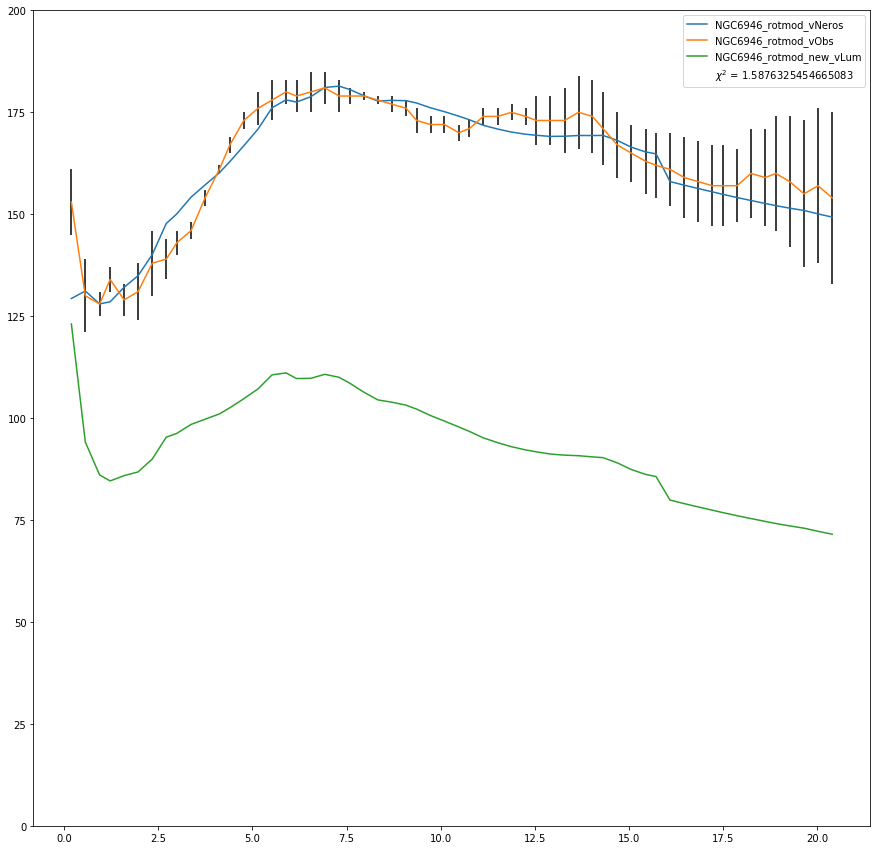

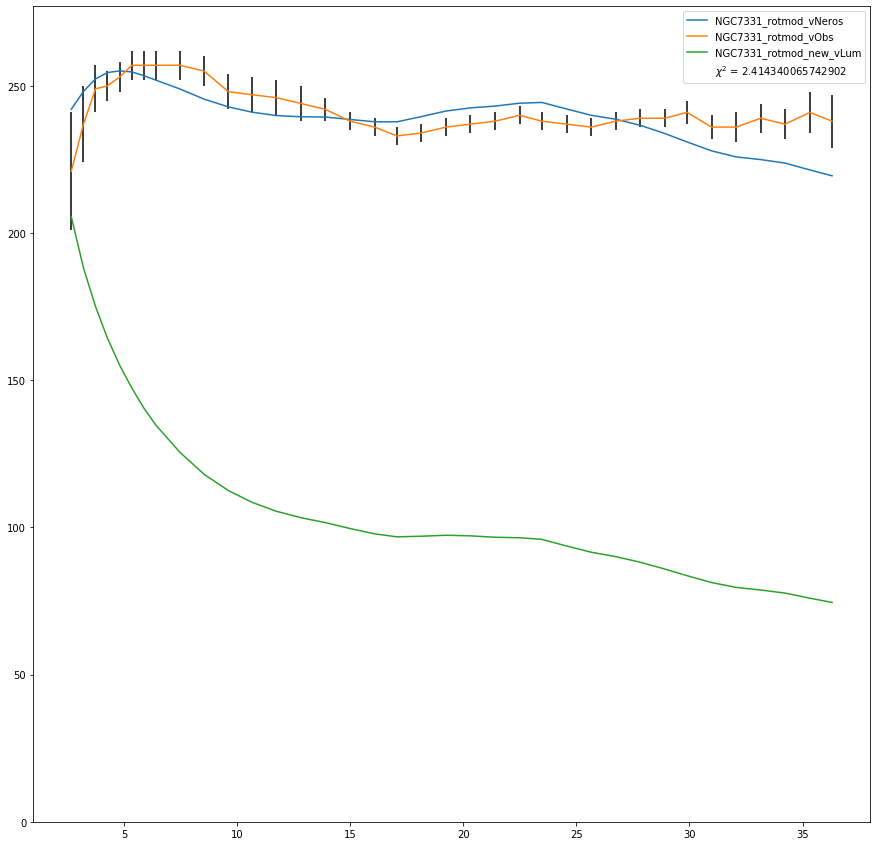

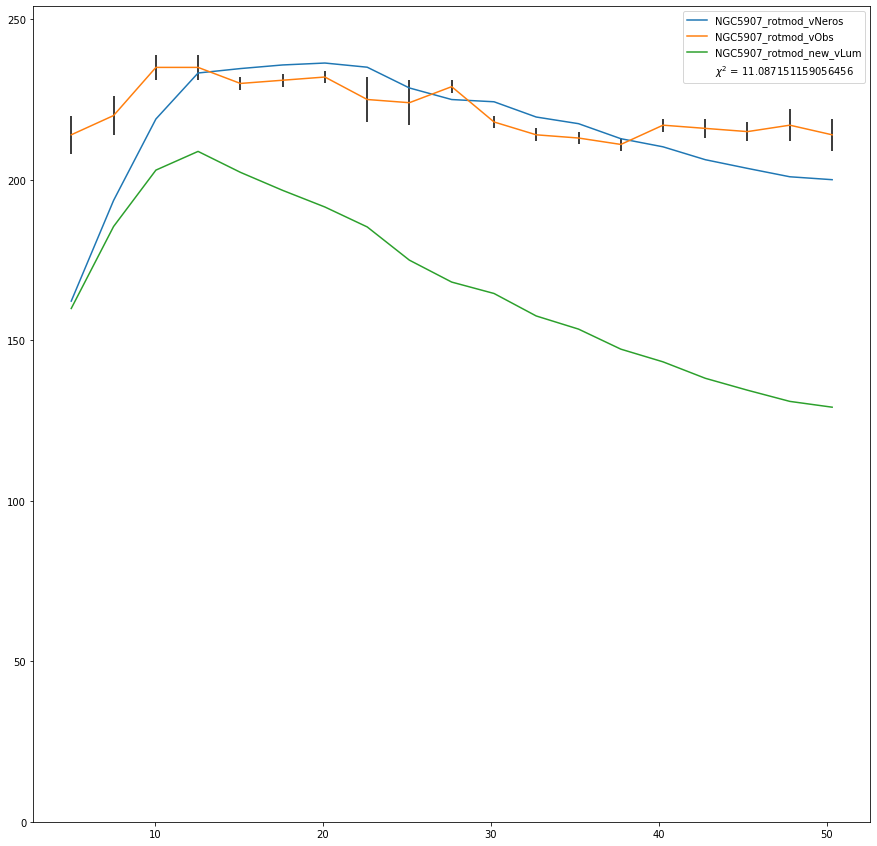

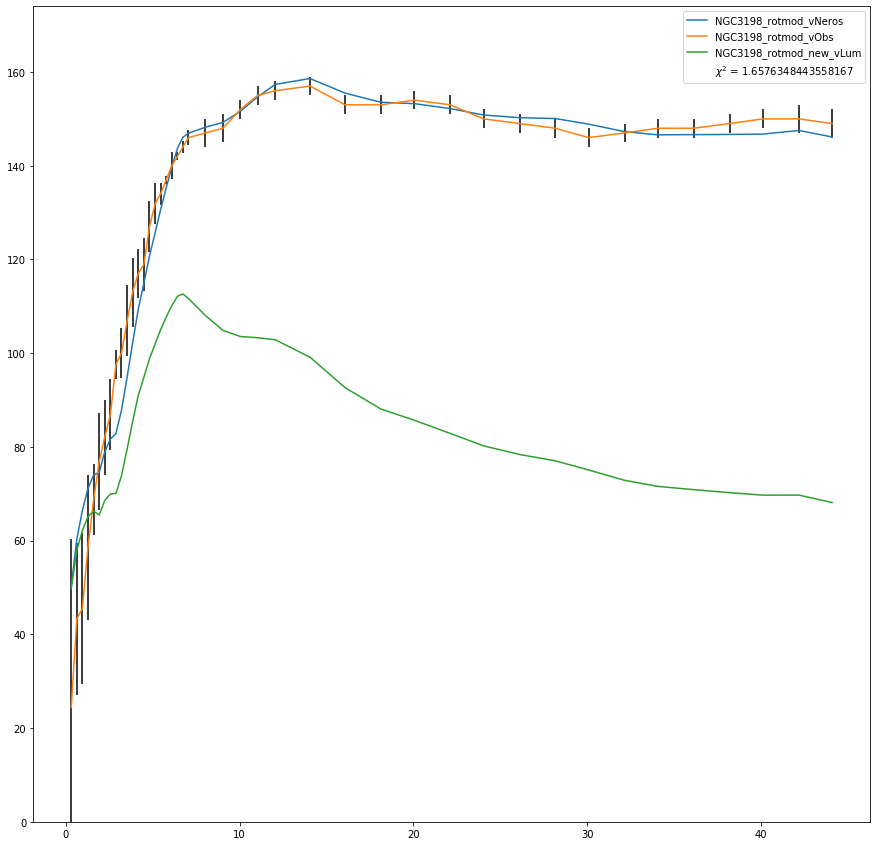

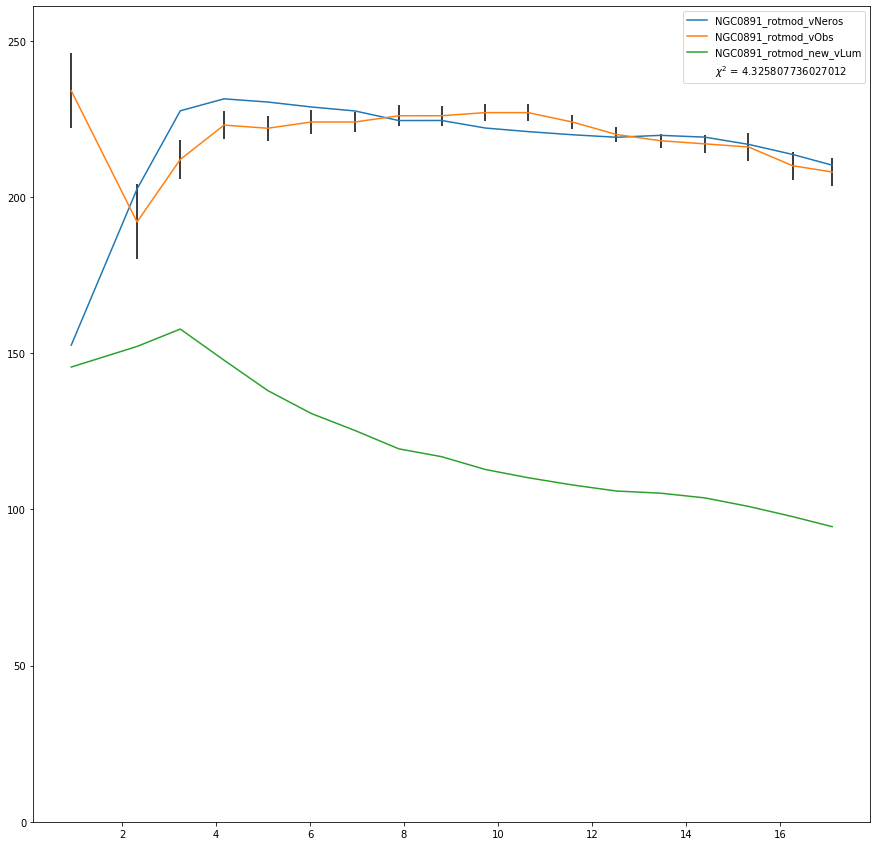

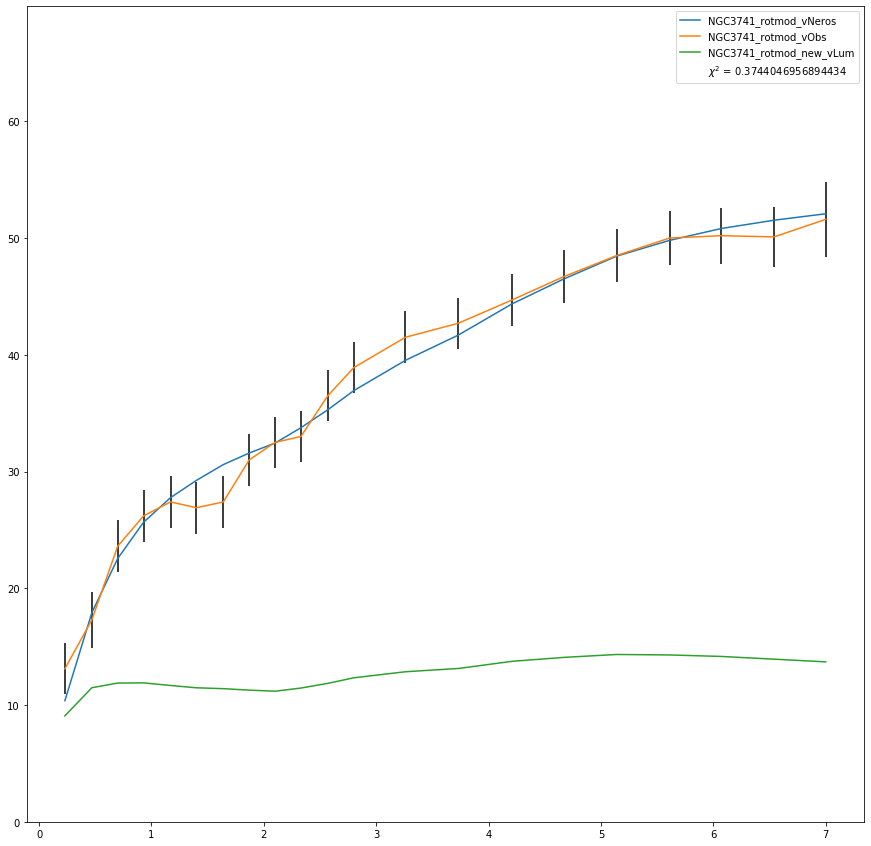

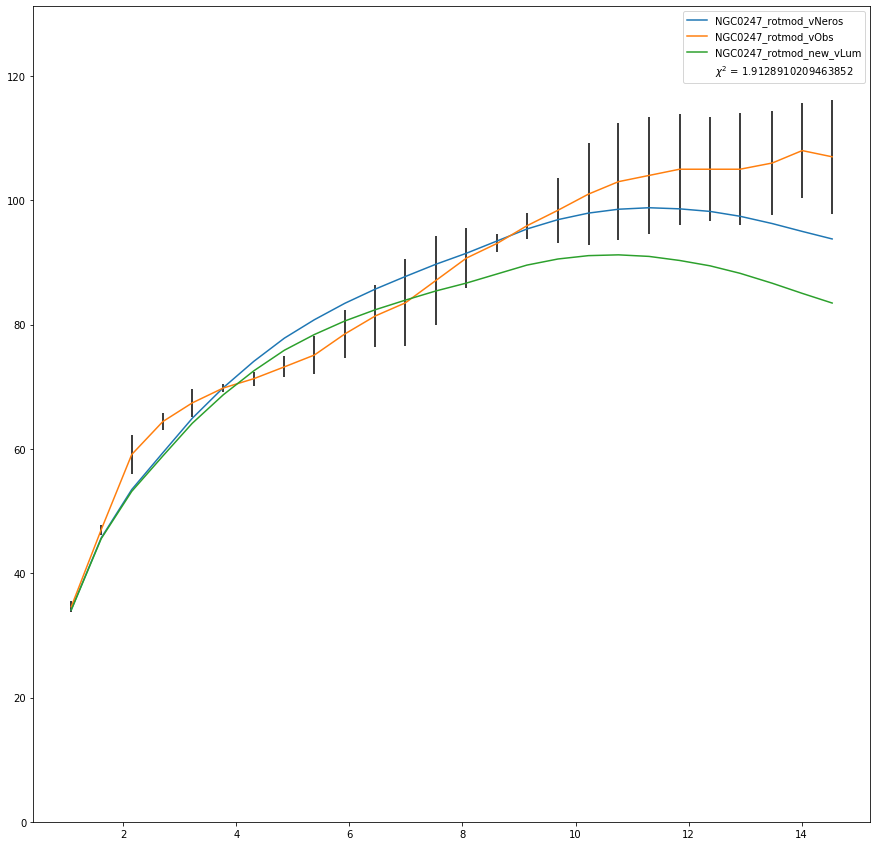

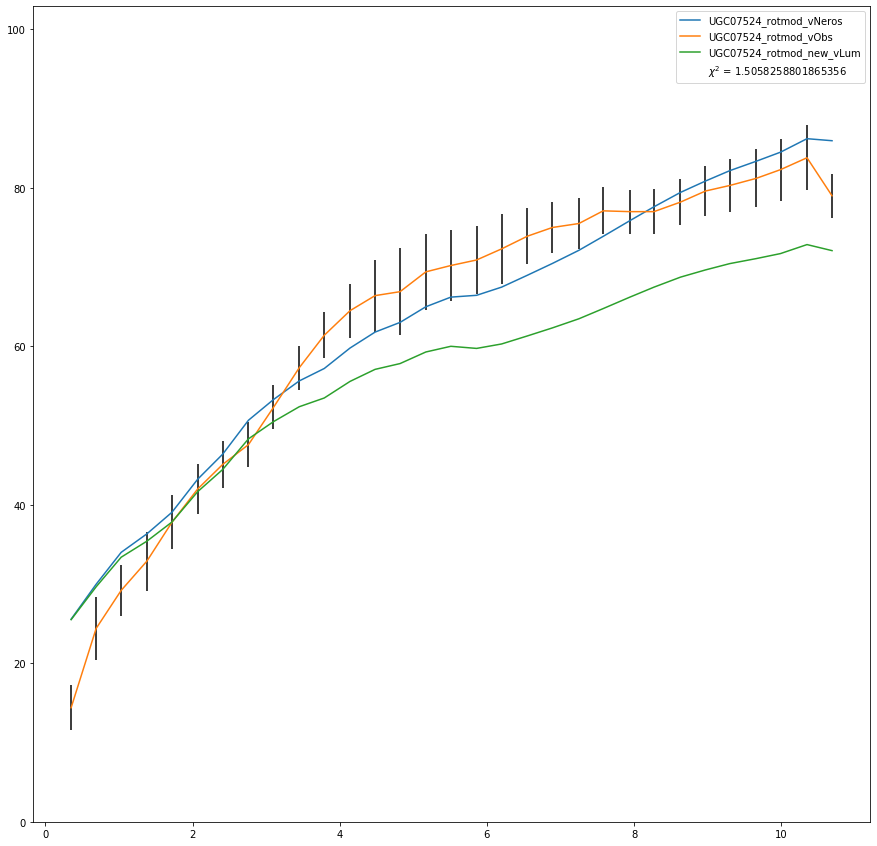

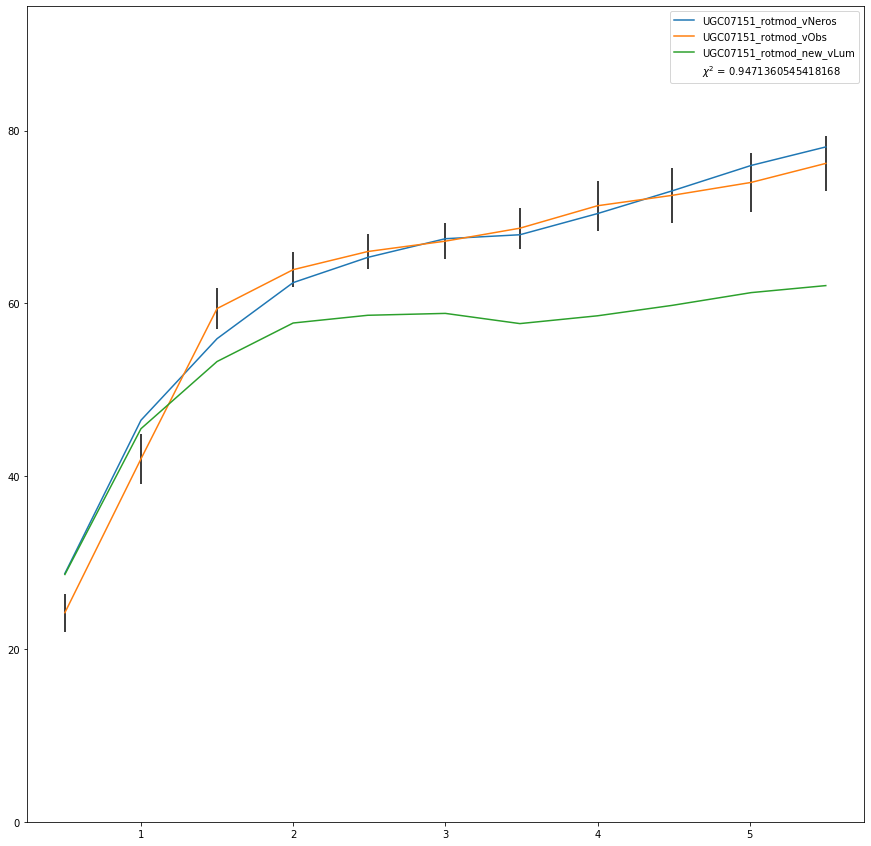

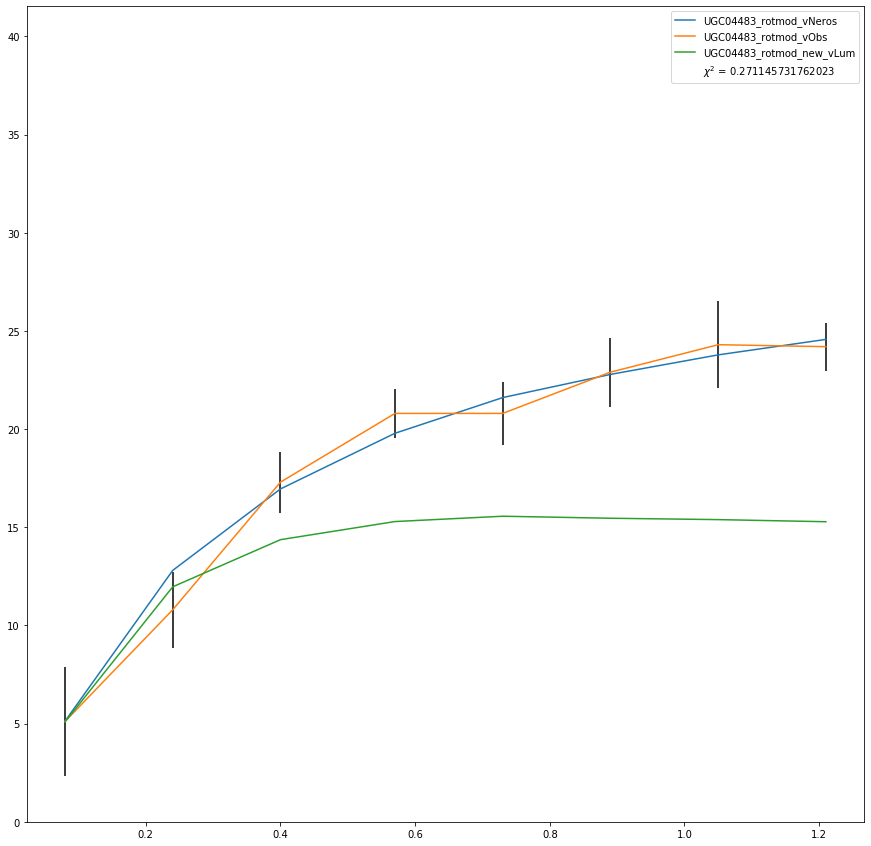

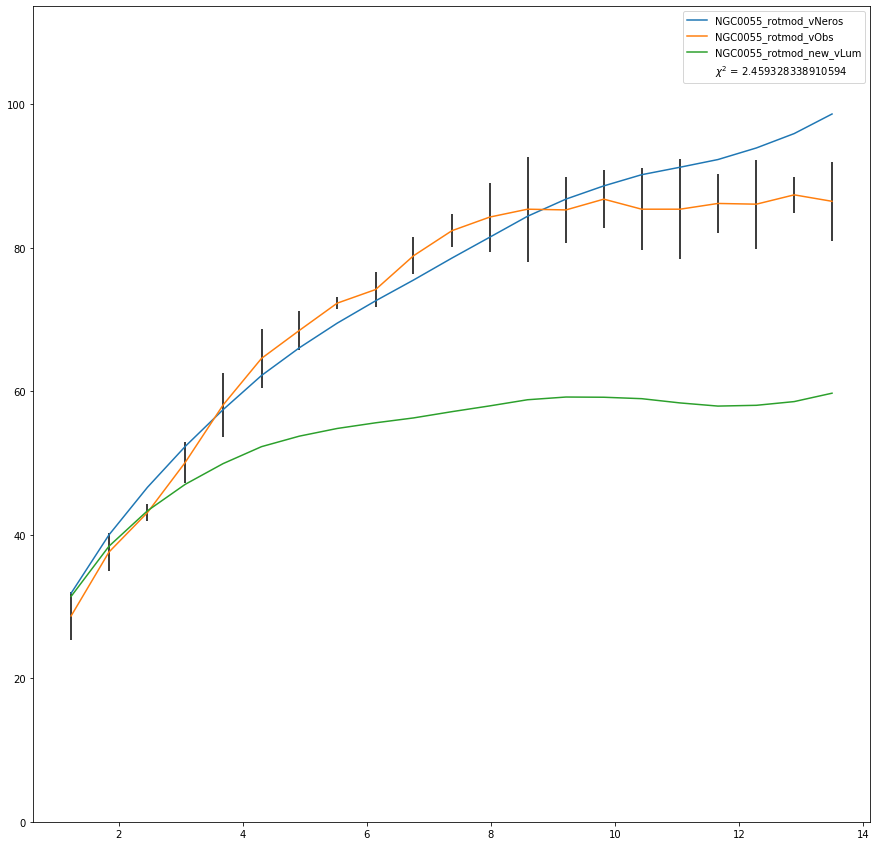

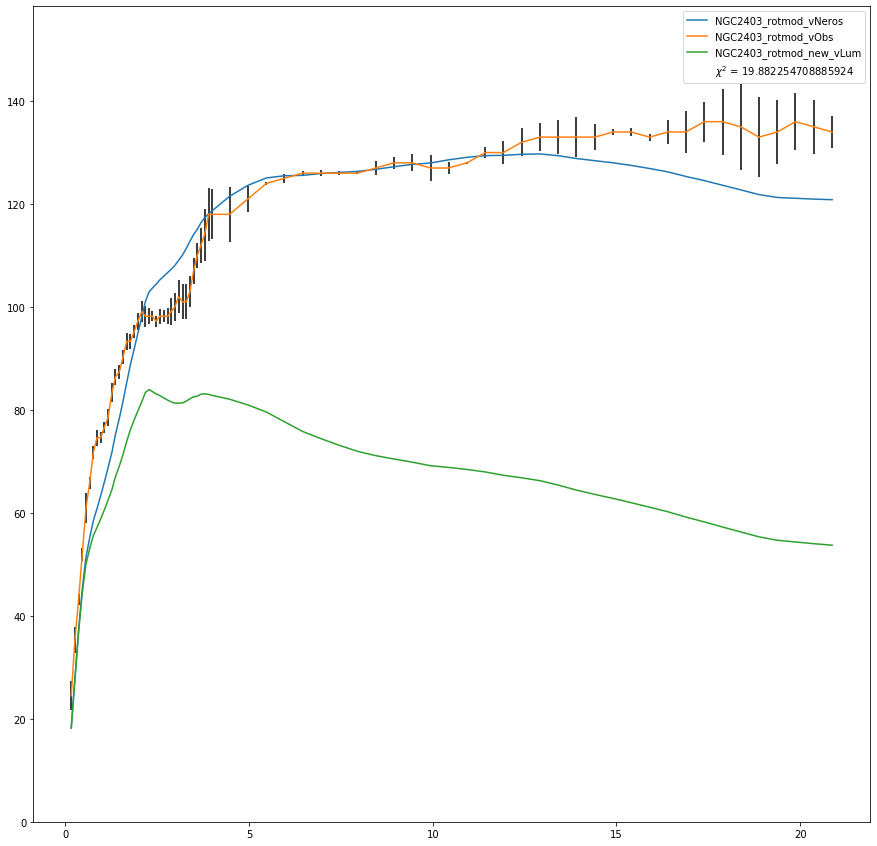

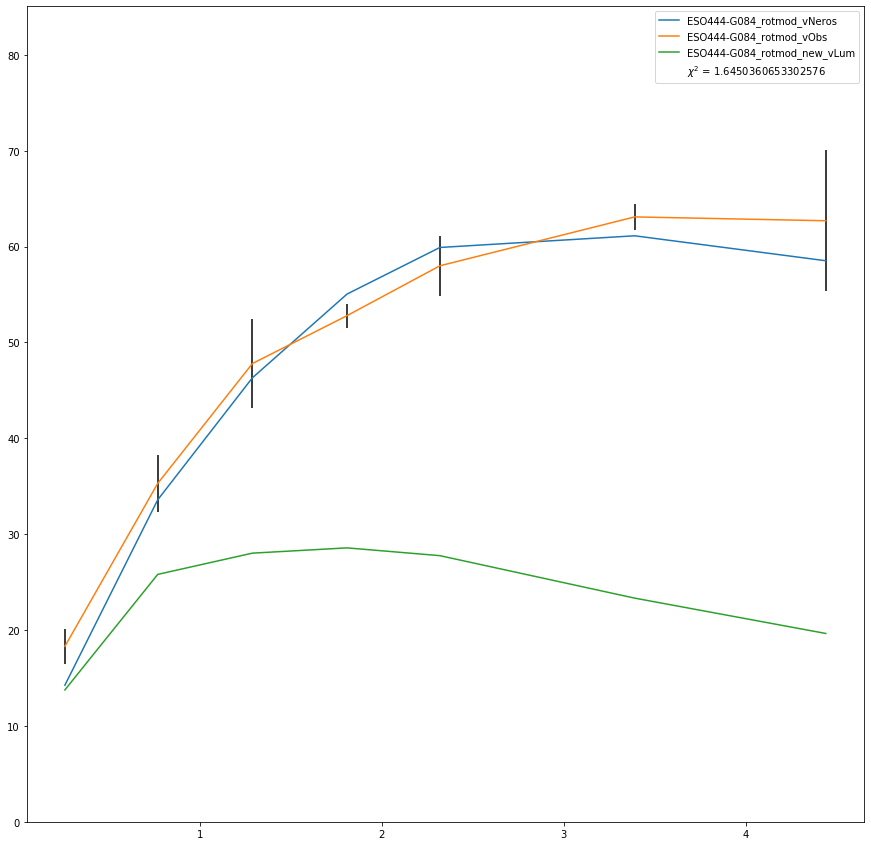

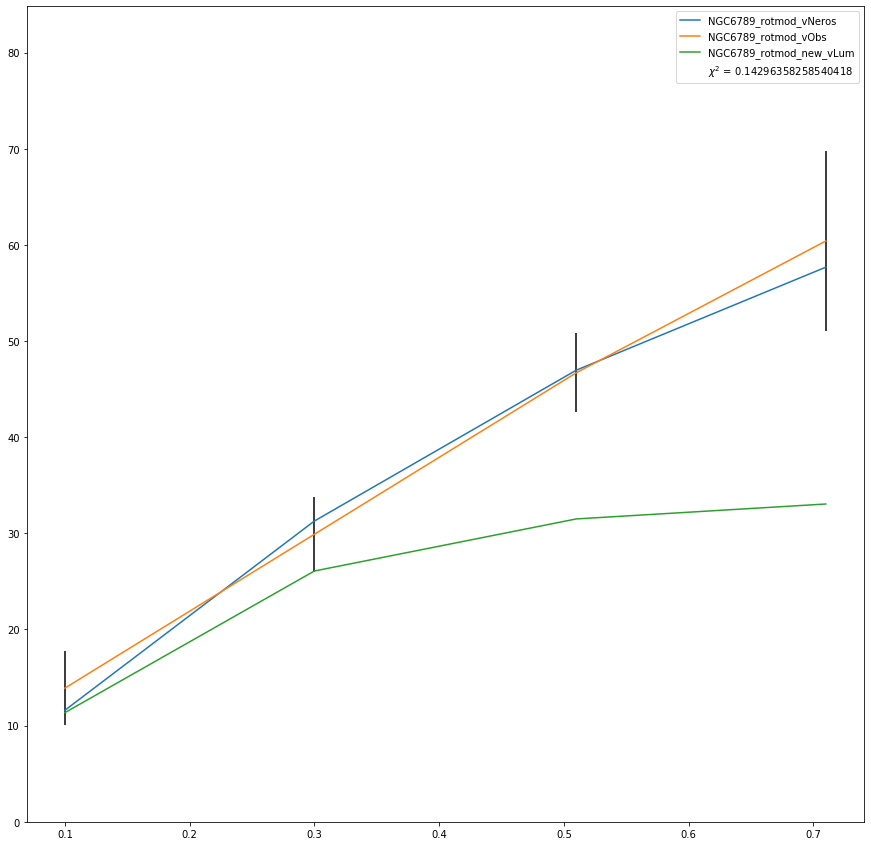

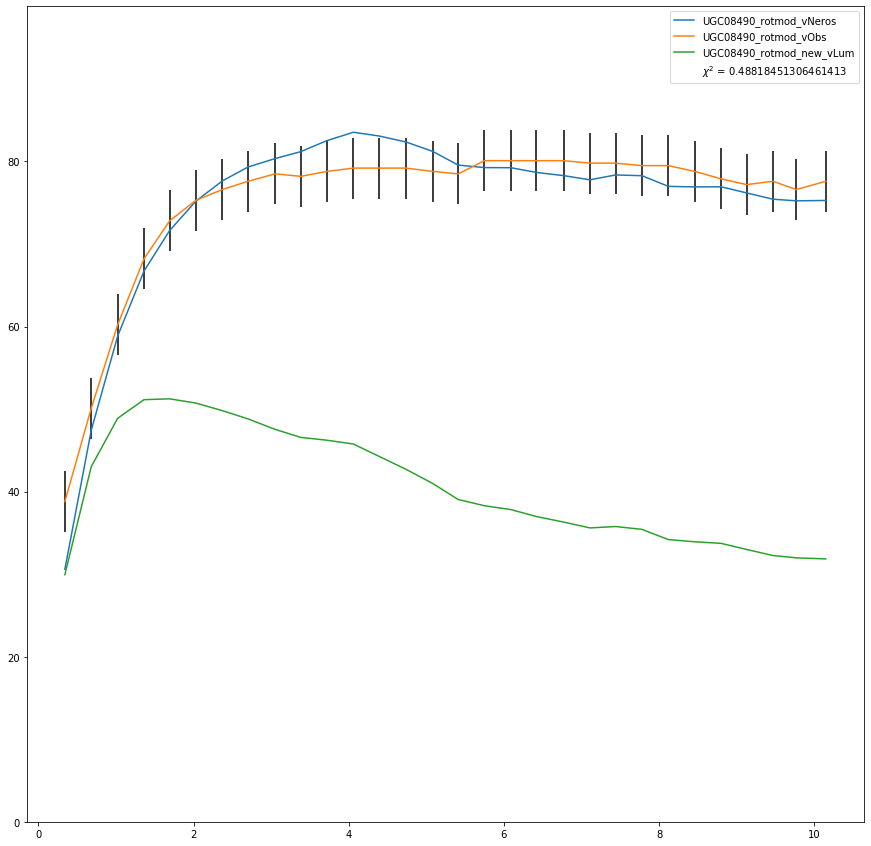

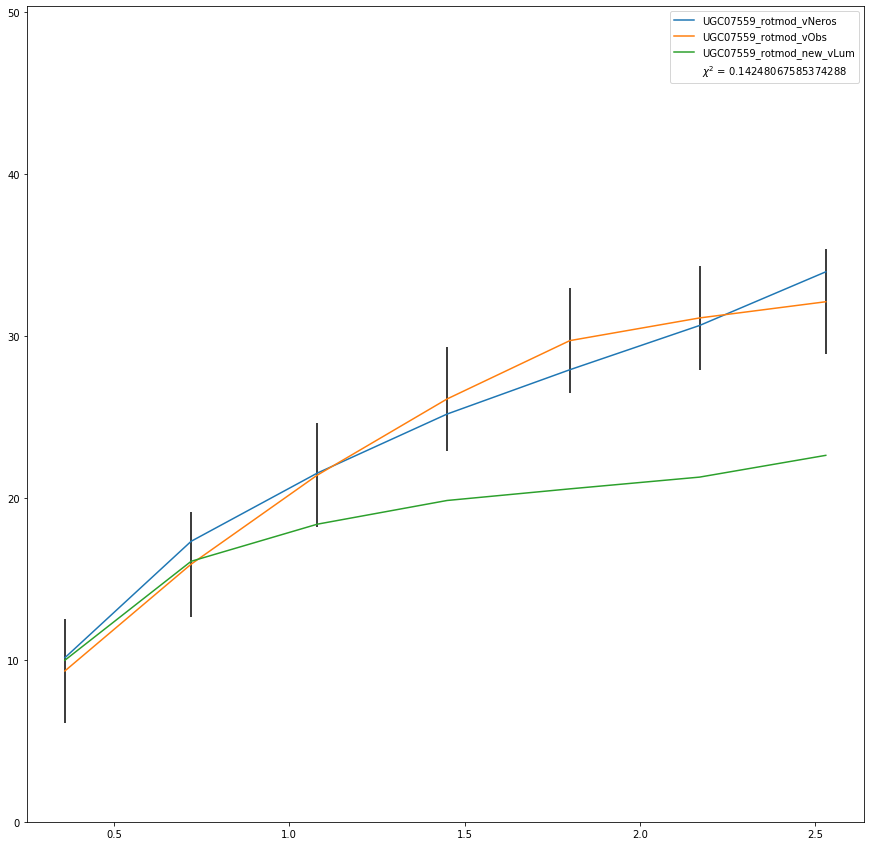

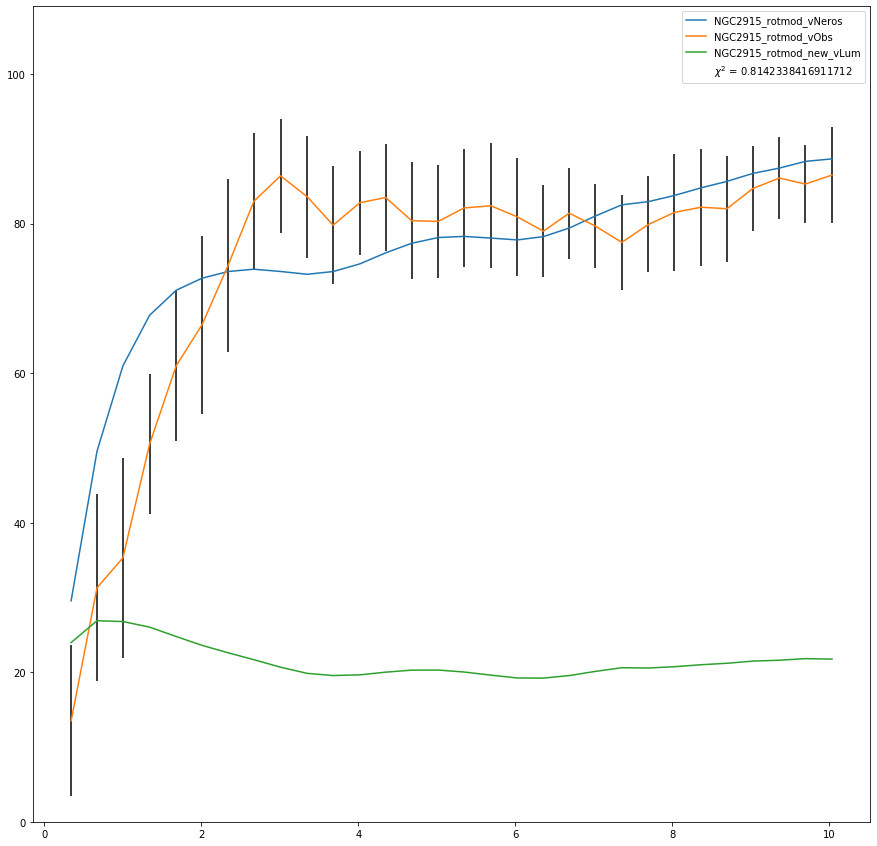

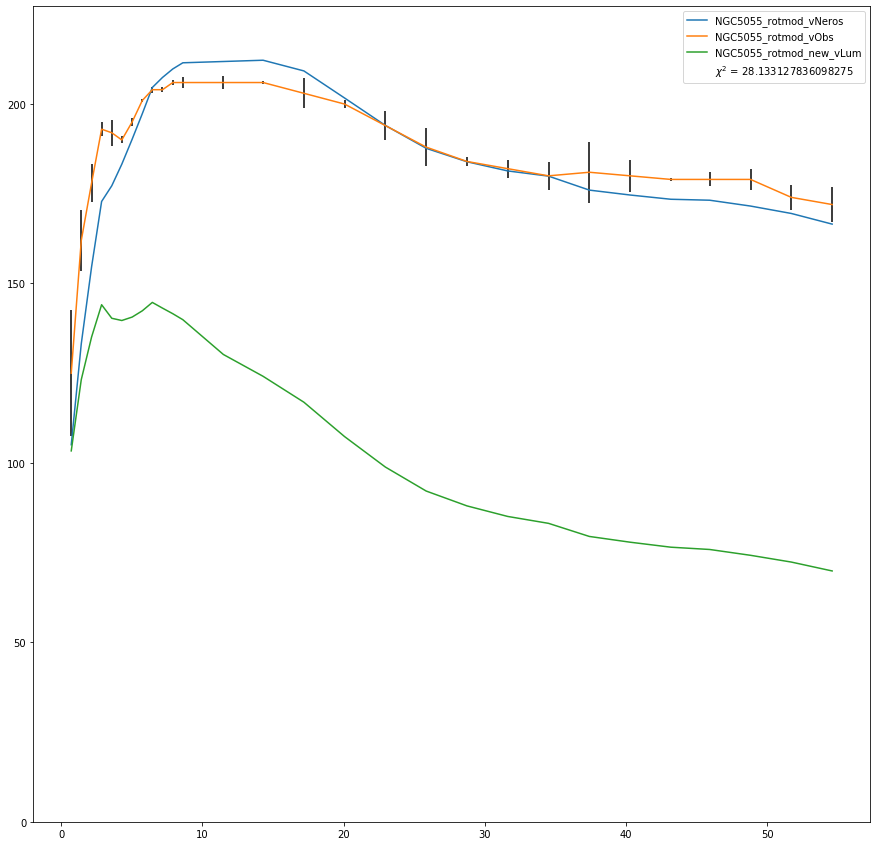

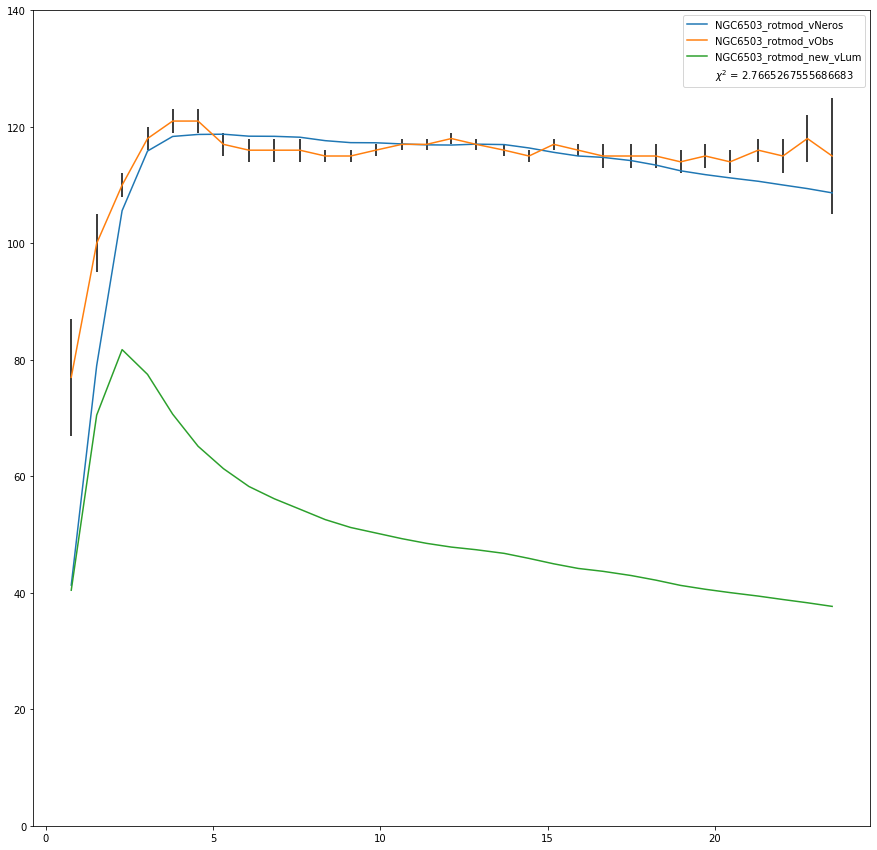

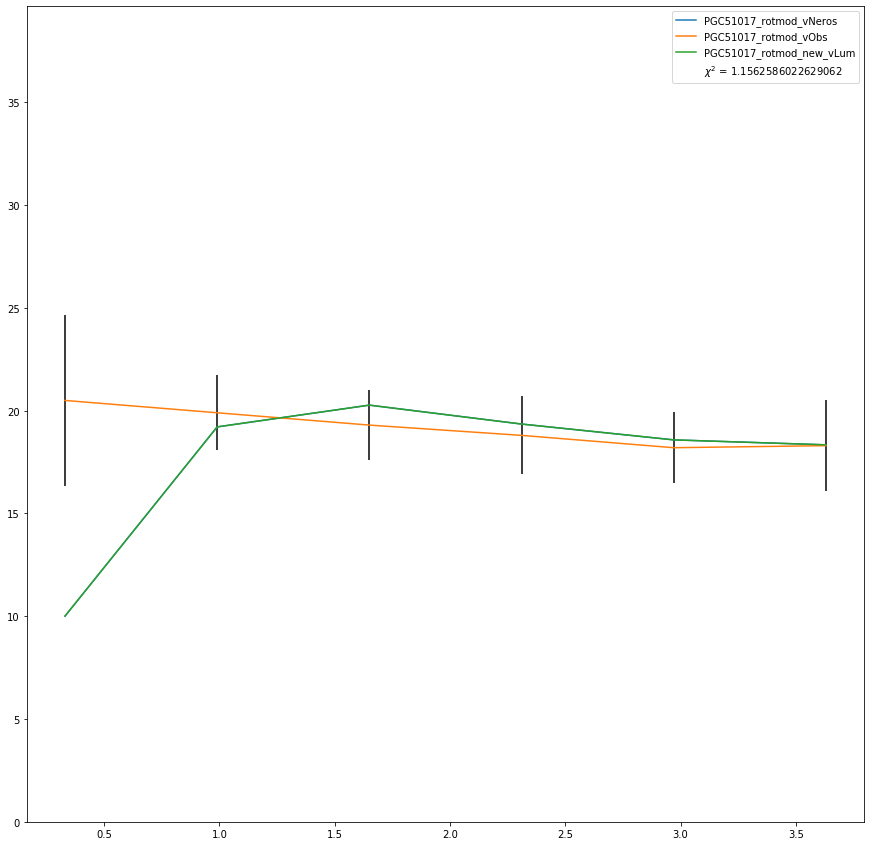

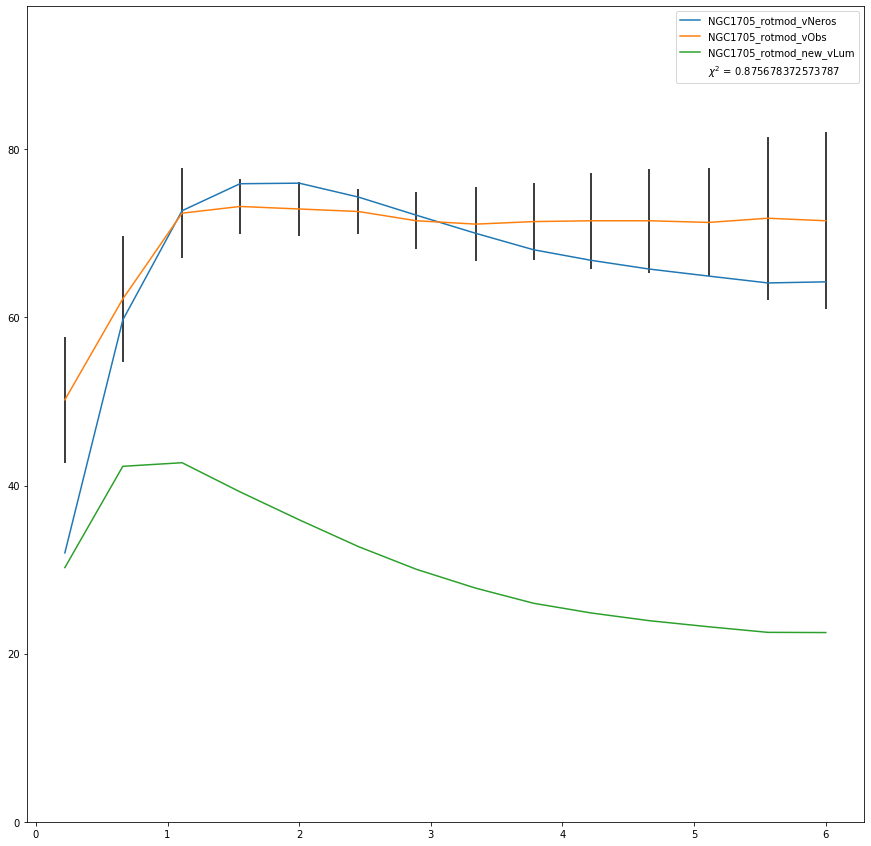

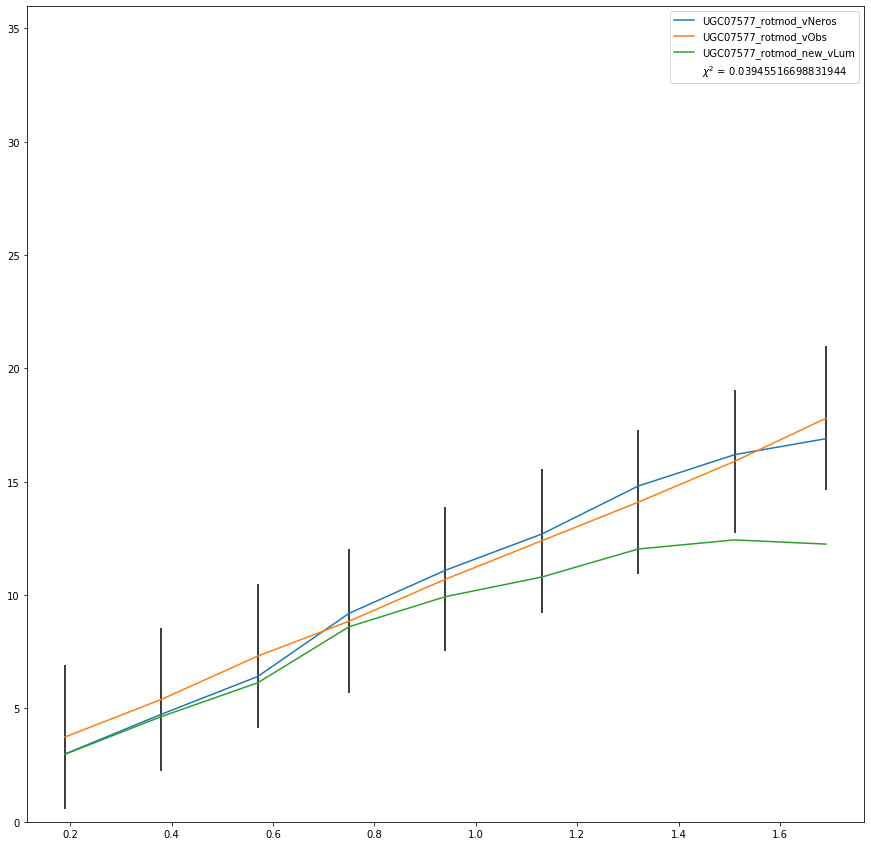

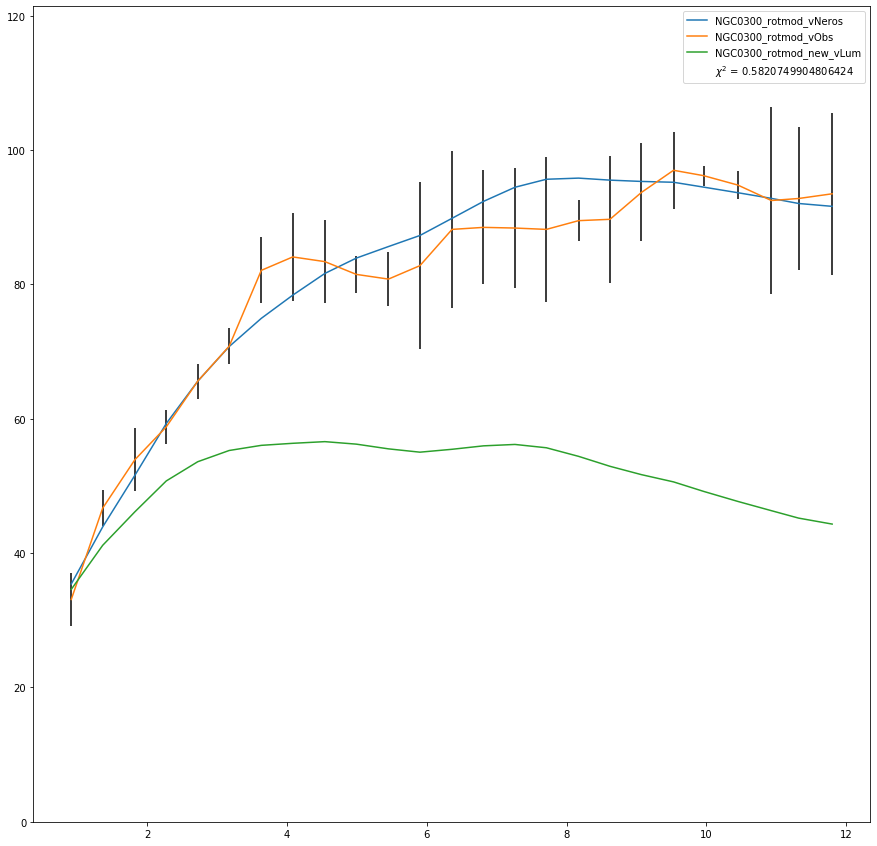

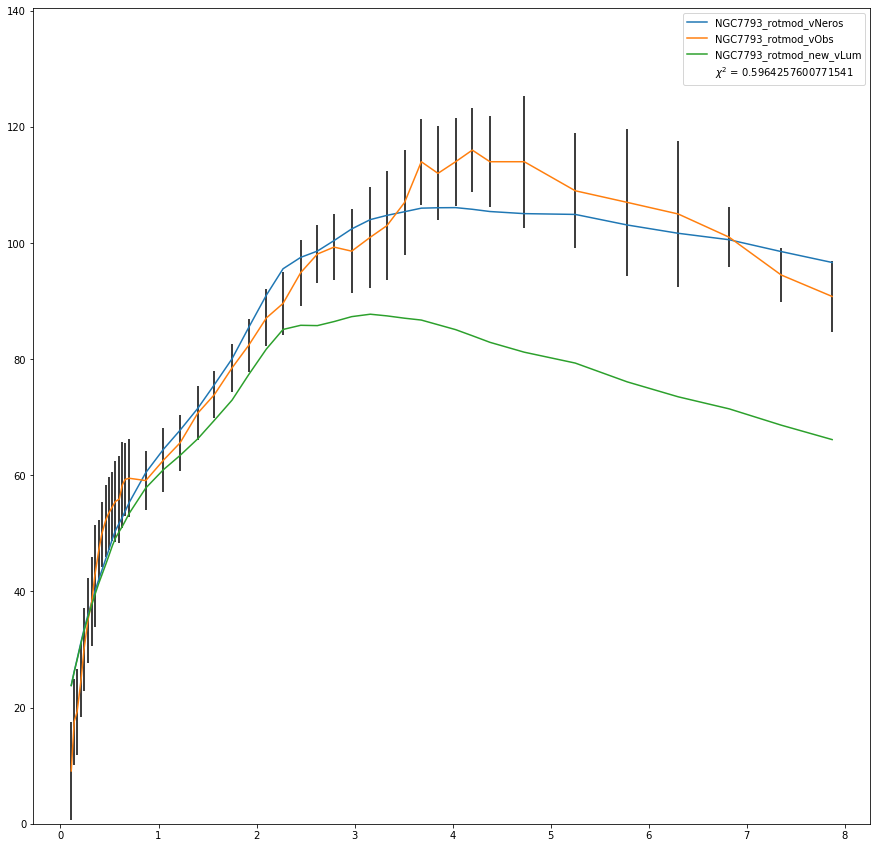

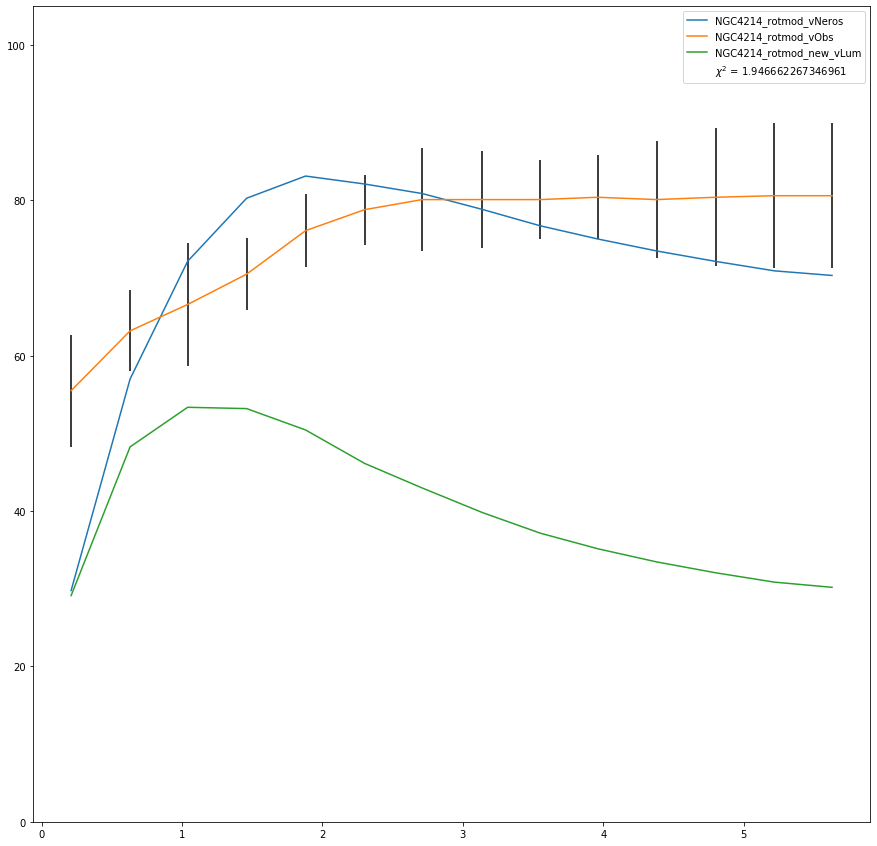

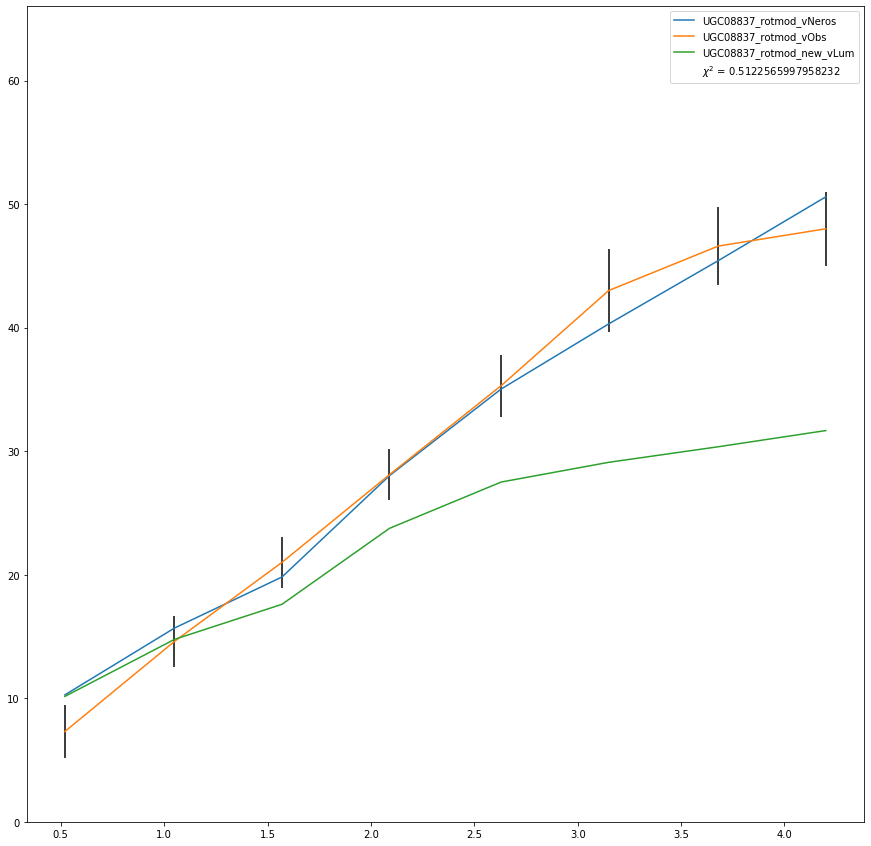

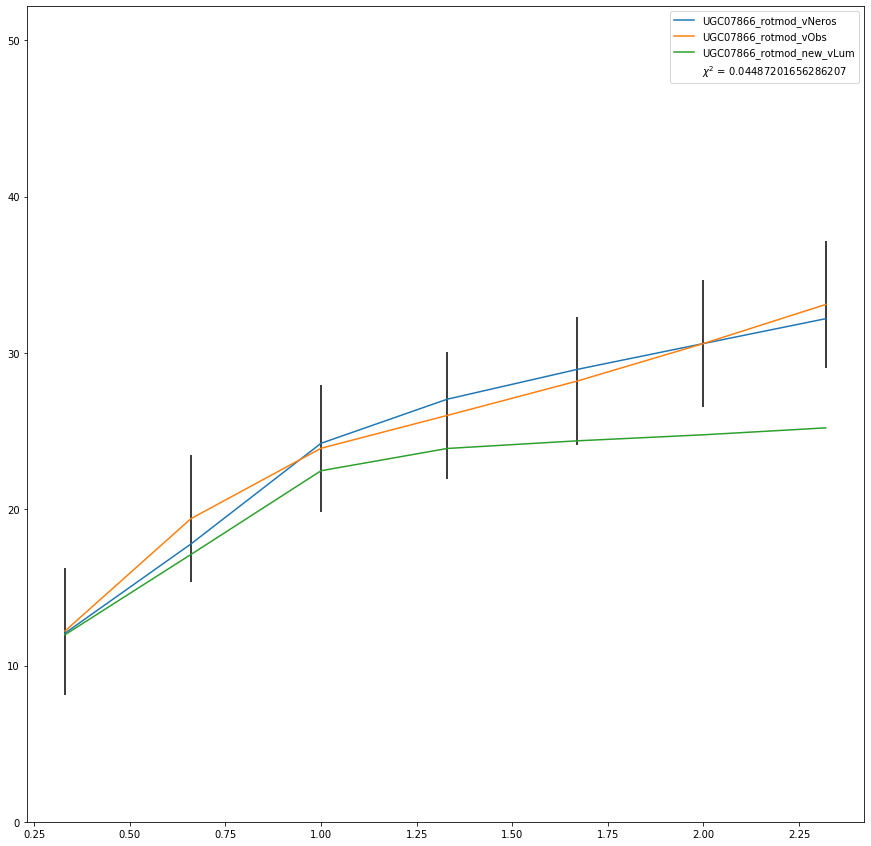

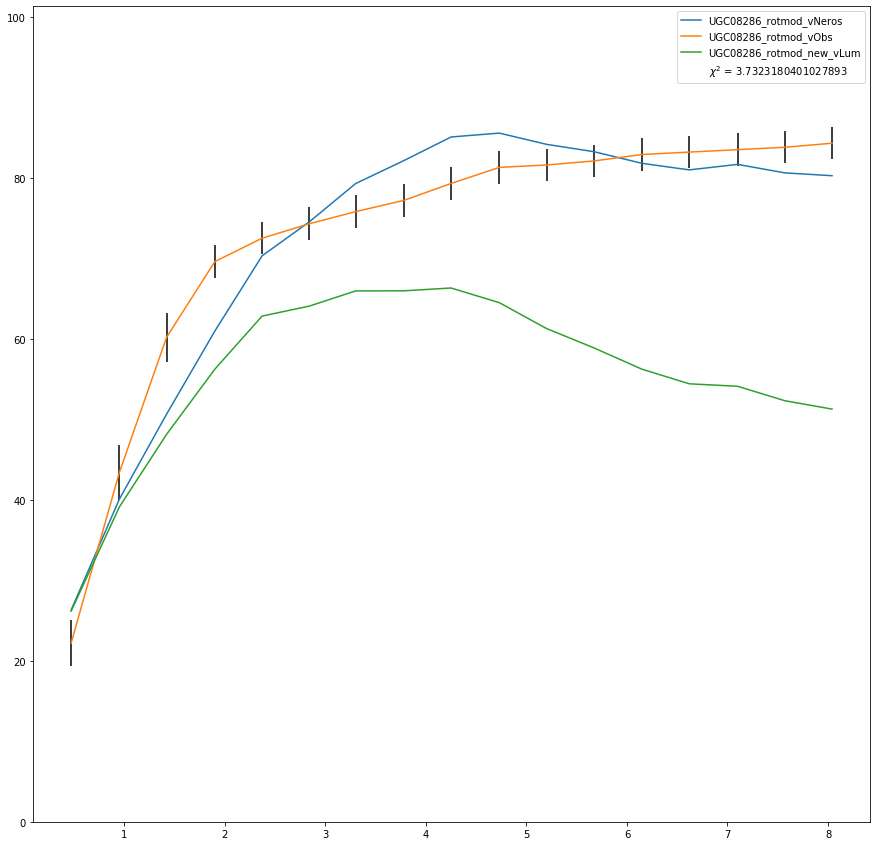

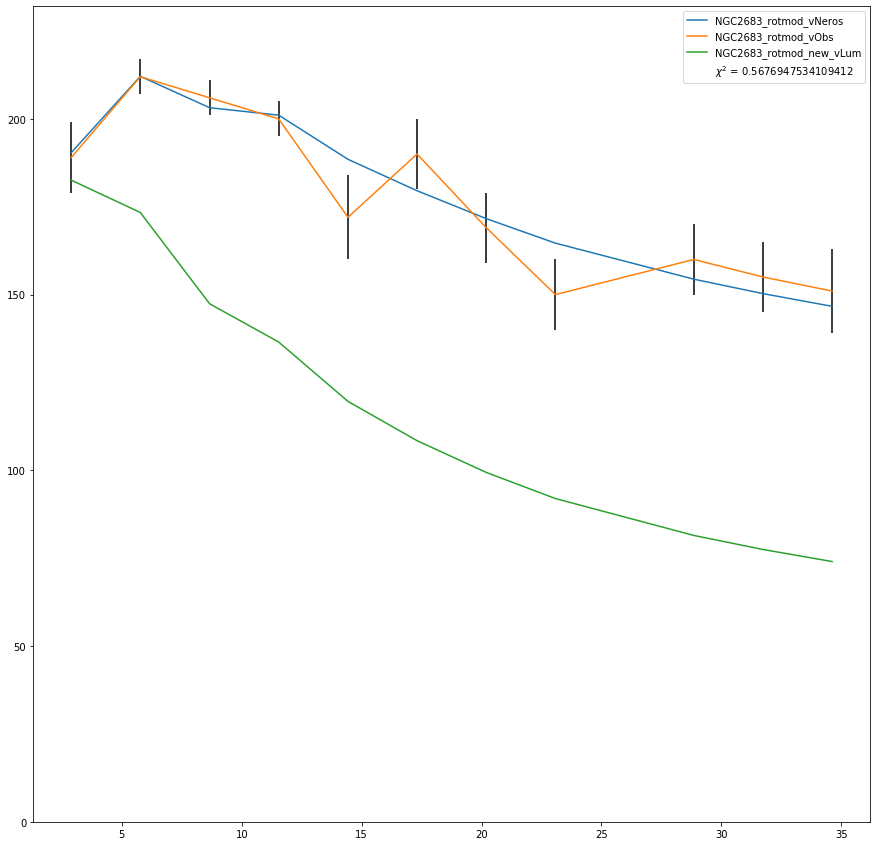

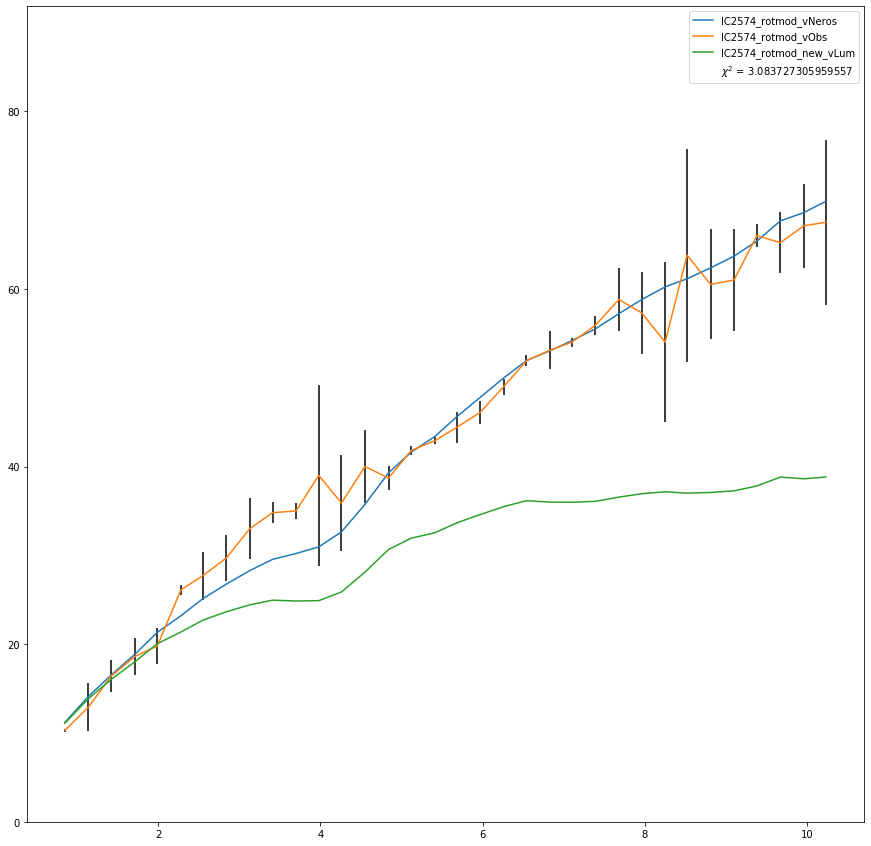

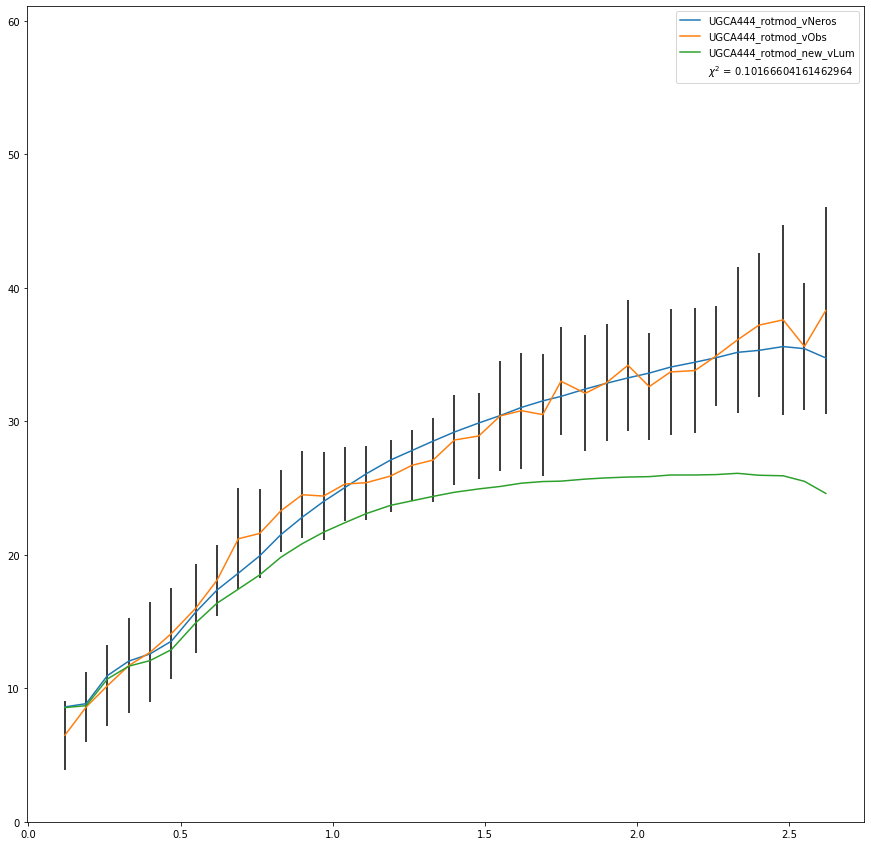

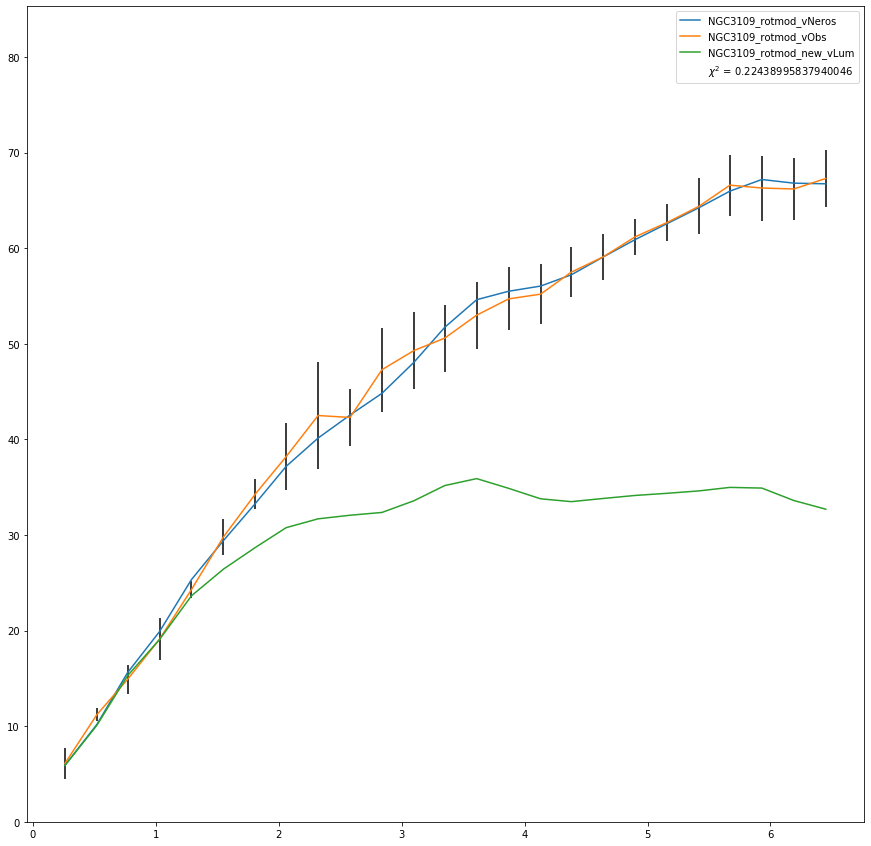

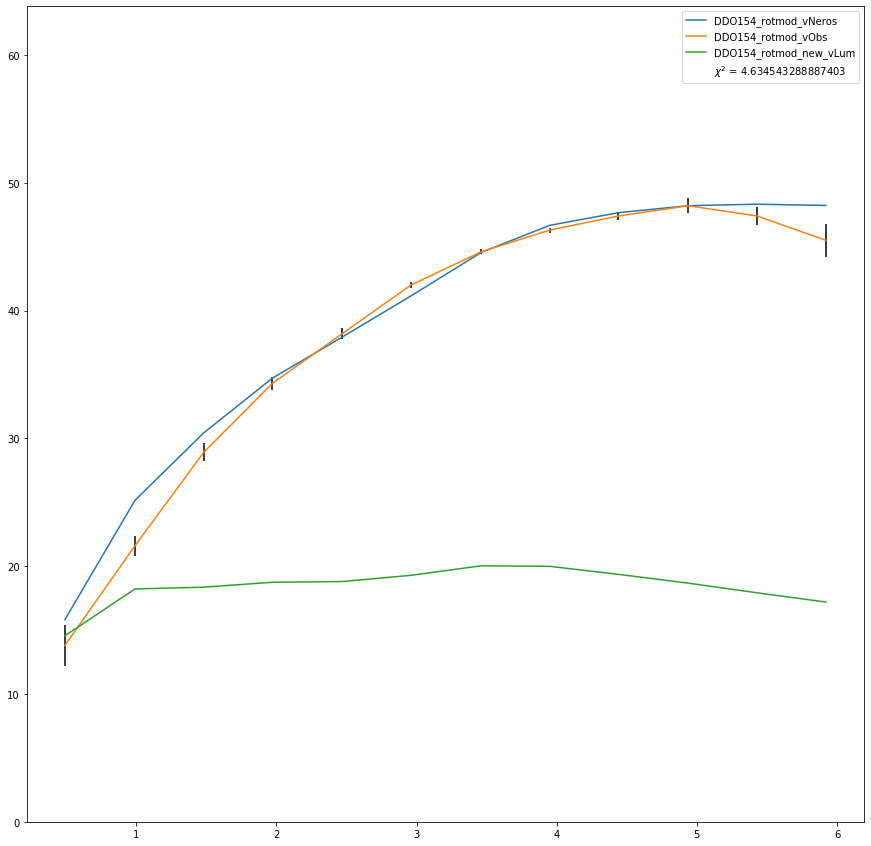

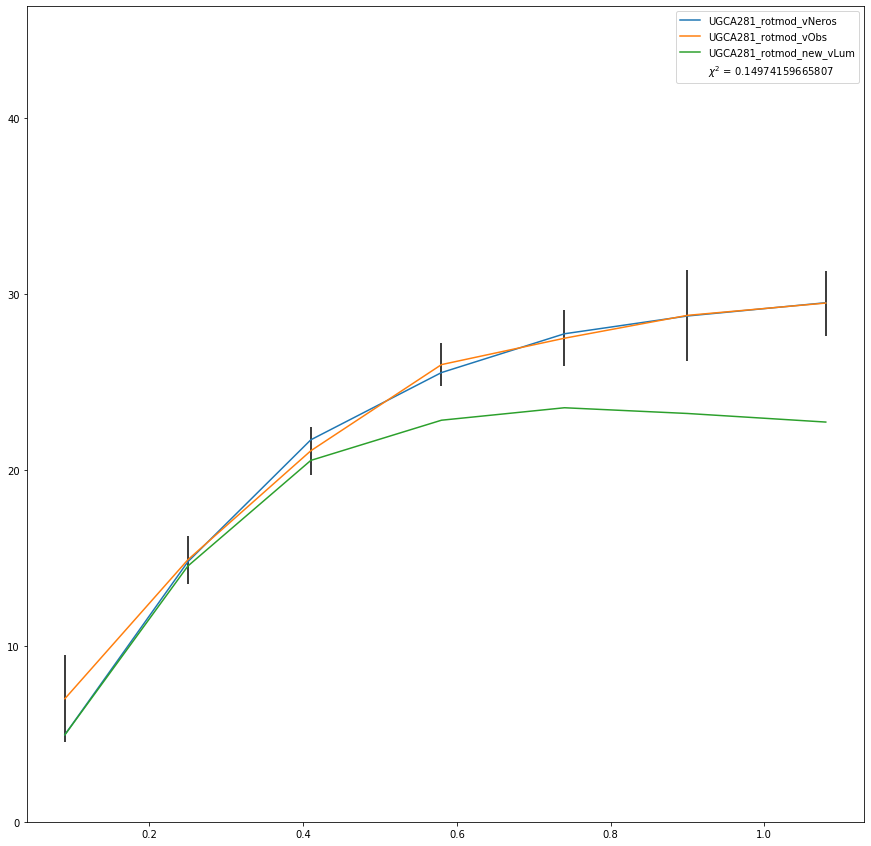

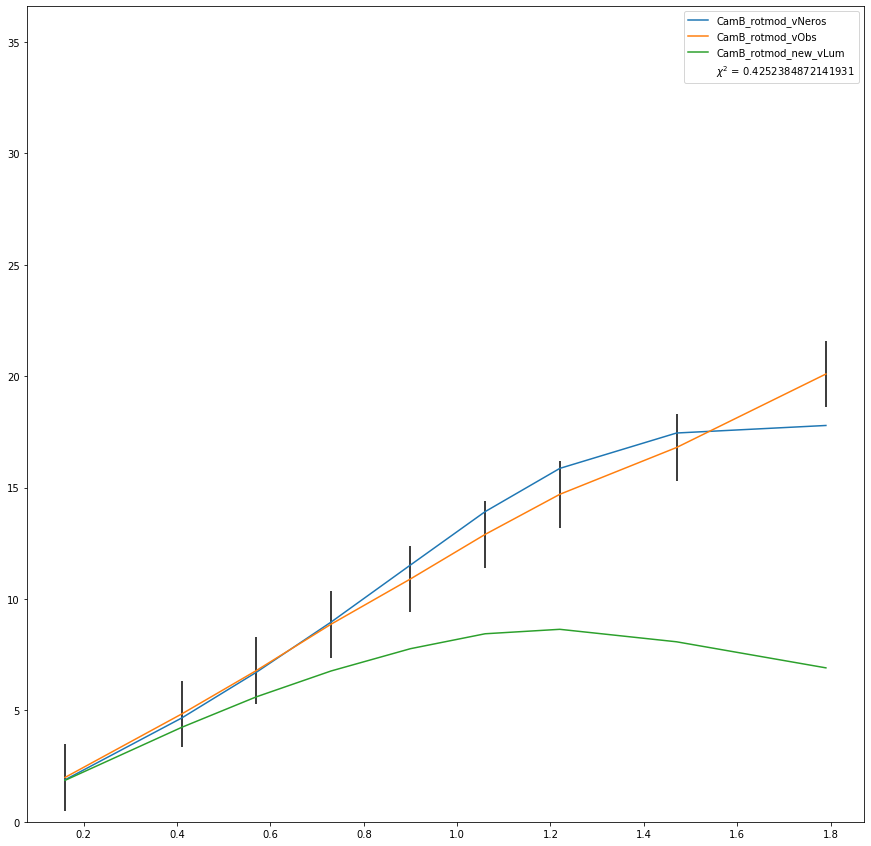

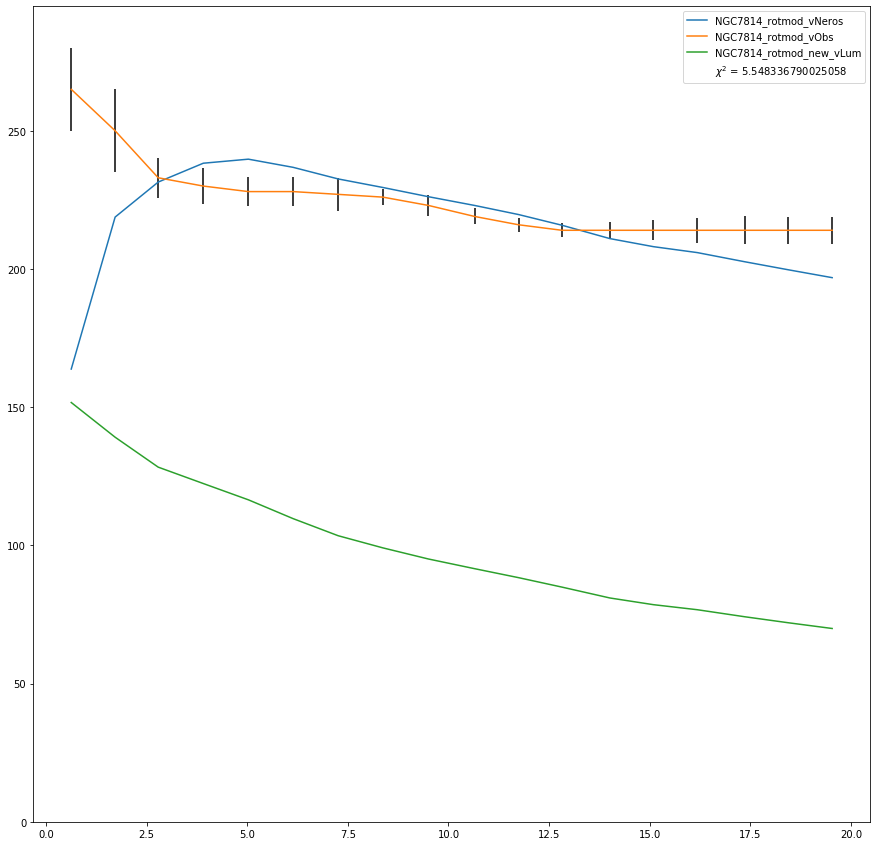

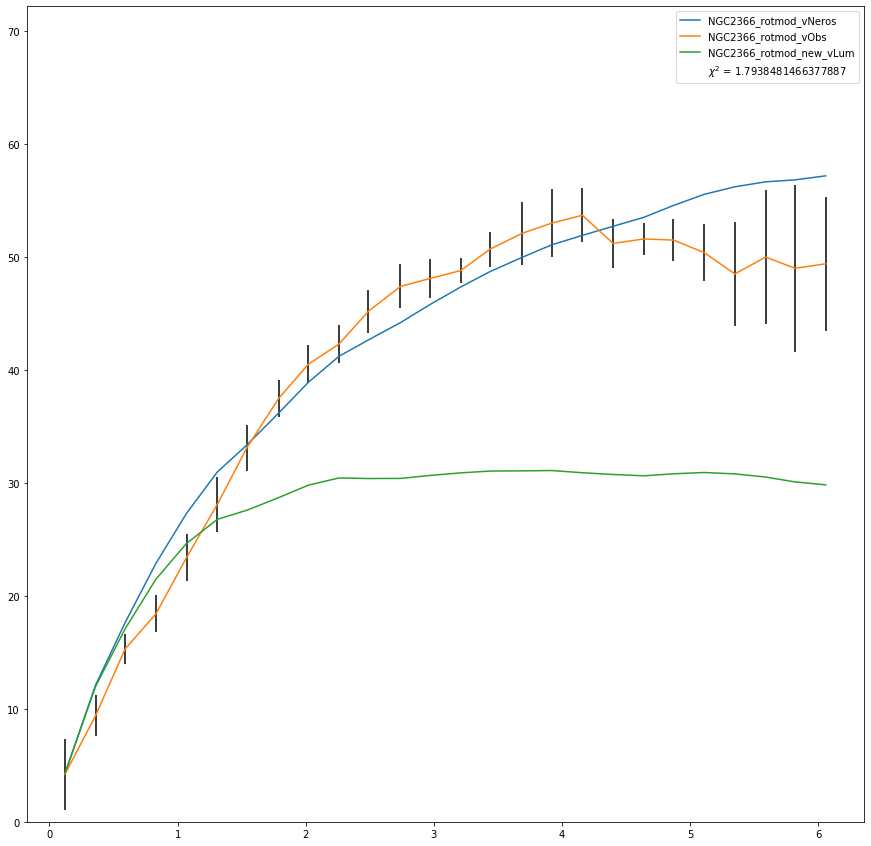

In [5]:
"""
This is the main body of the model. 
It loops through galaxies in the designated sample,
it calculates vLCM, vNeros, and chiSquared,
it fits galaxy data using alpha and vLumFreeParam,
it prints the values of alpha and vLumFreeParam to the console,
and it saves the graphs to a file.
"""

# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data_" + str(galaxies_name) + "_" + str(MW_name) + "_" + str(v1v2) + ".csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2},{3},{4},{5}\n'.format("Galaxy", "chi_square",  "alpha", "disk_scale", "bulge_scale","phi_zero"))
f.close()

total_chi_squared = []


for galaxyName in galaxies:
    f, ax = plt.subplots(1, figsize = (15, 15))
    
    # Extract out the needed galaxy components
    galaxy = np.array(galaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]

    # Just fit then extract the relevant pieces
    neros_fns.fit(galaxy_rad, galaxy_gas, galaxy_disk, galaxy_bulge, galaxy_vObs, galaxy_error)

    print(f"galaxyName is: {galaxyName}")
    fit_results = neros_fns.get_fit_results(galaxy_rad)
    for param in fit_results:
        print(f"{param} is: {fit_results[param]}")
    print("--------------------------")
    
    total_chi_squared.append(fit_results['chi_squared'])
    
    print("Running average chi_squared: {}".format(sum(total_chi_squared)/len(total_chi_squared)))

    
    # Write galaxyName, fitted parameters
    with open(out_file, 'a') as f:
        f.write(f"{galaxyName},{fit_results['chi_squared']},{fit_results['alpha']}, \
                {fit_results['disk_scale']},{fit_results['bulge_scale']},{fit_results['phi_zero']} \n")
    f.close()

    trimmed_rad = neros_fns.get_rad()
    trimmed_vLum_updated = neros_fns.get_vLum_scaled()
    trimmed_vObs = neros_fns.get_vObs()
    trimmed_error = neros_fns.get_vObsError()
    vNeros = neros_fns.get_vNeros()
    
    # plot
    # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
    # or to the maximum value in the list vNeros, whichever is the bigger number
    y_max = max(max(trimmed_vObs + trimmed_error), max(vNeros))
    ax.set_ylim(bottom = 0, top = y_max + 15)

    # plot vObs and vNeros and updated vLum
    ax.plot(trimmed_rad, vNeros, label="{}_vNeros".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vObs, label="{}_vObs".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vLum_updated, label="{}_new_vLum".format(galaxyName))
    ax.plot([],[], ' ', label="$\chi^2$ = {}".format(fit_results['chi_squared']))

    # error bar in vObs
    for i in range(len(trimmed_rad)):
        ax.vlines(trimmed_rad[i], trimmed_vObs[i] - trimmed_error[i], trimmed_vObs[i] + trimmed_error[i])

    ax.legend(loc="upper right")

    graph_file_name = "graphs/" + str(galaxies_name)+ "_" + str(MW_name)+ "_" + str(v1v2)

    plt.savefig(graph_file_name)
